In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("2016-building-energy-benchmarking.csv")

# 1ère exploration du dataframe

In [3]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [4]:
df.describe(include='all')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115

In [5]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


# Nettoyage

In [6]:
# identification des lignes où résidentiel
resid = df.loc[df.BuildingType.isin(['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)'])].index
len(resid)

1708

In [7]:
# supprimer les lignes où résidentiel
df.drop(resid, inplace=True)

In [8]:
df # c'est bon au niveau du nbre de lignes

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [9]:
# suppression de la colonne 'Comments'
df.drop("Comments", axis=1, inplace=True)

In [10]:
# suppression de la colonne 'Outlier'
df.drop('Outlier', axis=1, inplace=True)

In [11]:
df.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [12]:
df.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [13]:
# identifier les lignes où "low-rise family"
lr_family = df.loc[df.PrimaryPropertyType.isin(['Low-Rise Multifamily'])].index
lr_family

Int64Index([644, 1300, 2450], dtype='int64')

In [14]:
# suppression de ces 3 lignes
df.drop(lr_family, inplace=True)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053

In [15]:
# suppression des lignes index 578 et 2670: Nan dans toutes les colonnes
nuls_index = df[df.NumberofBuildings.isna() == True].index
df.drop(nuls_index, inplace=True)

In [16]:
# suppression de la ligne index 304: Nan dans colonne SiteEUI(kBtu/sf)
nuls_ind304 = df[df["SiteEUI(kBtu/sf)"].isna() == True].index
df.drop(nuls_ind304, inplace=True)

In [17]:
# suppression de la ligne index 563: Nan dans 2 colonnes SiteEnergyUse(kBtu)
nuls_ind563 = df[df["SiteEnergyUseWN(kBtu)"].isna() == True].index
df.drop(nuls_ind563, inplace=True)

In [18]:
# suppression de la ligne index 3274: présente comme outlier principal dans une 1ère série de boxplots
index_remove = 3274
df.drop(index=index_remove, axis=0, inplace=True)

In [19]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053

## Boxplots distribution de chaque variable quantitative

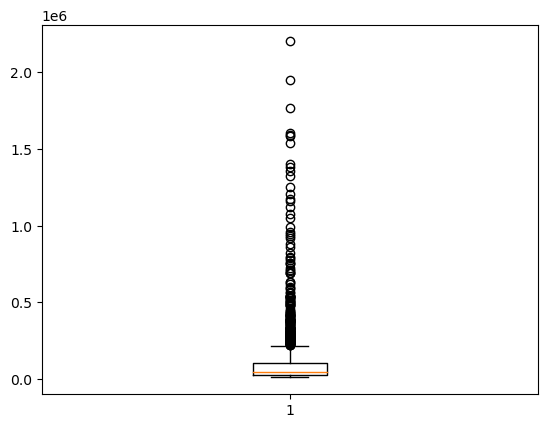

In [20]:
# boxplot pour observer la distribution de 'PropertyGFATotal'
col_propGFATotal = df.PropertyGFATotal
# Créer le boxplot
plt.boxplot(col_propGFATotal)
# Afficher le graphique
plt.show()

In [21]:
# "outliers" de la colonne 'PropertyGFATotal': index 559, 618, 1494
outl_propGFATotal = df.loc[(df['PropertyGFATotal'] > 1700000)]
outl_propGFATotal

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
559,775,2016,NonResidential,Large Office,Columbia Center - 2015,701 5th Avenue,Seattle,WA,98104.0,0942000640,7,DOWNTOWN,47.604540,-122.330720,1985,1.0,76,1952220,319400,1632820,"Office, Parking",Office,1680937.0,Parking,319368.0,NaN,NaN,2017201620152012200920072006,86.0,55.299999,55.099998,167.300003,166.500000,92937640.0,92537256.0,0.0,25747908.0,87851862.0,50857.63281,5085763.0,False,Compliant,882.56,0.45
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,173161.20310,17316120.0,False,Compliant,12307.16,6.97
1494,22062,2016,Campus,University,Entire Campus,901 12th Avenue,Seattle,WA,98122.0,2254500880,3,EAST,47.610650,-122.317110,1939,1.0,2,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,NaN,66.699997,71.599998,145.000000,151.300003,114648520.0,123205560.0,0.0,18075270.0,61672821.0,529756.93750,52975694.0,False,Compliant,3243.48,1.47


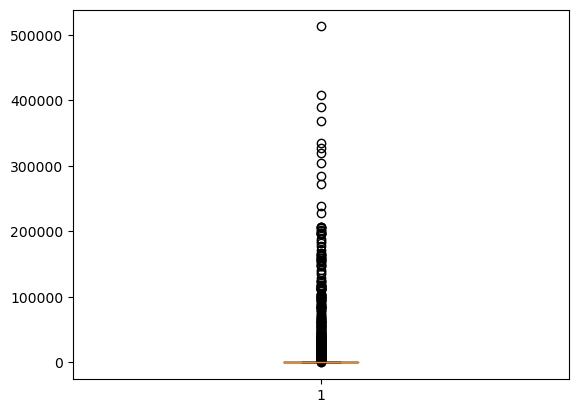

In [22]:
# boxplot pour observer la distribution de 'PropertyGFAParking'
col_propGFApark= df.PropertyGFAParking
# Créer le boxplot
plt.boxplot(col_propGFApark)
# Afficher le graphique
plt.show()

In [23]:
# outlier de la colonne 'PropertyGFAParking': index 273
outl_propGFApark = df.loc[(df['PropertyGFAParking'] > 500000)]
outl_propGFApark

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
273,402,2016,NonResidential,Large Office,US Bank Centre,1420 5th Avenue,Seattle,WA,98101.0,1975700080,7,DOWNTOWN,47.61054,-122.33466,1989,1.0,46,1536606,512608,1023998,"Financial Office, Office, Other, Parking, Rest...",Office,1002403.0,Parking,377046.0,Other,53116.0,201720162014201320122011201020092007,89.0,51.900002,53.599998,157.300003,162.699997,56606136.0,58506844.0,0.0,15729209.0,53668061.0,29380.69922,2938070.0,False,Compliant,530.18,0.35


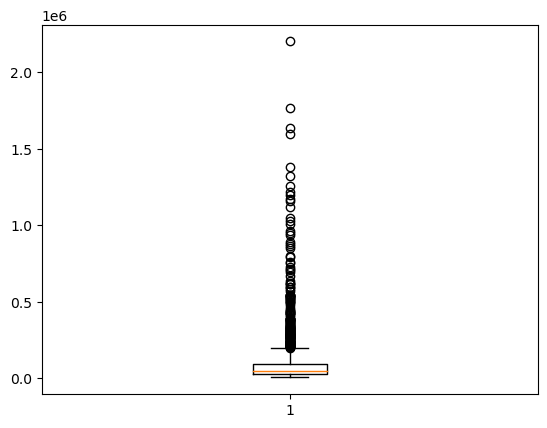

In [24]:
# boxplot pour observer la distribution de "PropertyGFABuilding(s)"
col_propGFAbuild= df["PropertyGFABuilding(s)"]
# Créer le boxplot
plt.boxplot(col_propGFAbuild)
# Afficher le graphique
plt.show()

In [25]:
# outlier de la colonne "PropertyGFABuilding(s)": 1494
outl_propGFAbuild = df.loc[(df["PropertyGFABuilding(s)"] > 2000000)]
outl_propGFAbuild

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
1494,22062,2016,Campus,University,Entire Campus,901 12th Avenue,Seattle,WA,98122.0,2254500880,3,EAST,47.61065,-122.31711,1939,1.0,2,2200000,0,2200000,"College/University, Parking",College/University,1719643.0,Parking,318960.0,NaN,NaN,NaN,NaN,66.699997,71.599998,145.0,151.300003,114648520.0,123205560.0,0.0,18075270.0,61672821.0,529756.9375,52975694.0,False,Compliant,3243.48,1.47


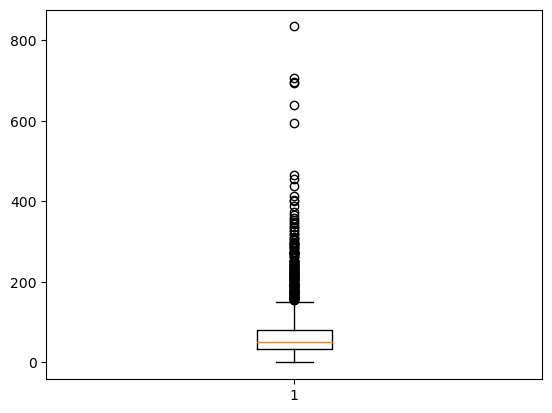

In [26]:
# boxplot pour observer la distribution de "SiteEUI(kBtu/sf)"
col_siteEUI= df["SiteEUI(kBtu/sf)"]
# Créer le boxplot
plt.boxplot(col_siteEUI)
# Afficher le graphique
plt.show()

In [27]:
# outliers de la colonne "SiteEUI(kBtu/sf)
outl_siteEUI = df.loc[(df["SiteEUI(kBtu/sf)"] > 500)]
outl_siteEUI

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
240,365,2016,NonResidential,Other,UW Tower Data Center,4333 BROOKLYN AVE NE,Seattle,WA,98185.0,1142000290,4,NORTHEAST,47.66060,-122.31512,1969,1.0,5,36000,0,36000,Data Center,Data Center,36000.0,NaN,NaN,NaN,NaN,2016201520142013,96.0,834.400024,834.400024,2620.000000,2620.000000,30038490.0,30038490.0,0.0,8803777.0,30038487.0,0.000000,0.0,False,Compliant,209.41,5.82
309,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,100 4th Ave N,Seattle,WA,98109.0,1991200170,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,213834,104922,108912,"Data Center, Financial Office, Office, Other, ...",Parking,104922.0,Data Center,54385.0,Office,37721.0,NaN,100.0,707.299988,707.299988,2217.800049,2217.800049,75073888.0,75073888.0,0.0,21957020.0,74917352.0,1565.250000,156525.0,False,Compliant,530.59,2.48
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.61438,-122.33871,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1496.720215,149672.0,False,Compliant,1921.82,4.48
809,19900,2016,NonResidential,Laboratory,3000/3018 Western,3018 Western Ave.,Seattle,WA,98121.0,0695000090,7,DOWNTOWN,47.61763,-122.35507,1926,0.0,4,49249,0,49249,"Laboratory, Office",Laboratory,40584.0,Office,7165.0,NaN,NaN,NaN,NaN,696.700012,693.099976,1206.699951,1195.099976,33268410.0,33092532.0,0.0,3181345.0,10854749.0,224136.609400,22413661.0,False,Compliant,1266.06,25.71
3171,49709,2016,NonResidential,Other,"Seattle ProCure Management, LLC.",1570 North 115th Street,Seattle,WA,98013.0,3026049128,5,NORTHWEST,47.71286,-122.33635,2012,1.0,2,53575,0,53575,Urgent Care/Clinic/Other Outpatient,Urgent Care/Clinic/Other Outpatient,53575.0,NaN,NaN,NaN,NaN,NaN,NaN,593.599976,593.599976,1527.300049,1527.300049,31803568.0,31803568.0,0.0,6791757.5,23173477.0,86300.890630,8630089.0,False,Compliant,619.90,11.57
3203,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,2020 Fifth Avenue,Seattle,WA,98121.0,0659000905,7,DOWNTOWN,47.61449,-122.33956,1975,1.0,7,90679,35120,55559,"Data Center, Parking",Data Center,60000.0,Parking,30700.0,NaN,NaN,NaN,100.0,694.700012,694.700012,2181.300049,2181.300049,41680640.0,41680640.0,0.0,12215895.0,41680634.0,0.000000,0.0,False,Compliant,290.57,3.20


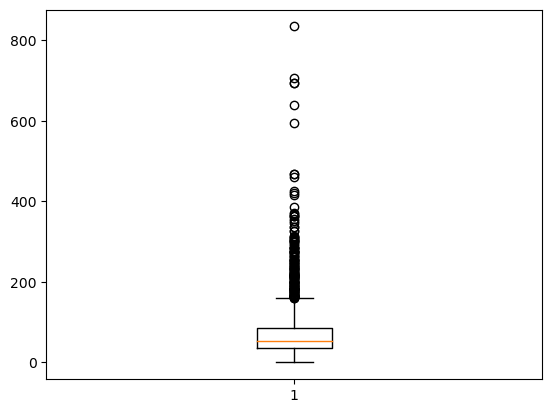

In [28]:
# boxplot pour observer la distribution de "SiteEUIWN(kBtu/sf)"
col_siteEUIWN= df["SiteEUIWN(kBtu/sf)"]
# Créer le boxplot
plt.boxplot(col_siteEUIWN)
# Afficher le graphique
plt.show()

In [29]:
# outliers de la colonne "SiteEUIWN(kBtu/sf)"" -> sans surprise, les mêmes que SiteEUI
outl_siteEUIWN = df.loc[(df["SiteEUIWN(kBtu/sf)"] > 500)]
outl_siteEUIWN

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
240,365,2016,NonResidential,Other,UW Tower Data Center,4333 BROOKLYN AVE NE,Seattle,WA,98185.0,1142000290,4,NORTHEAST,47.66060,-122.31512,1969,1.0,5,36000,0,36000,Data Center,Data Center,36000.0,NaN,NaN,NaN,NaN,2016201520142013,96.0,834.400024,834.400024,2620.000000,2620.000000,30038490.0,30038490.0,0.0,8803777.0,30038487.0,0.000000,0.0,False,Compliant,209.41,5.82
309,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,100 4th Ave N,Seattle,WA,98109.0,1991200170,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,213834,104922,108912,"Data Center, Financial Office, Office, Other, ...",Parking,104922.0,Data Center,54385.0,Office,37721.0,NaN,100.0,707.299988,707.299988,2217.800049,2217.800049,75073888.0,75073888.0,0.0,21957020.0,74917352.0,1565.250000,156525.0,False,Compliant,530.59,2.48
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.61438,-122.33871,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1496.720215,149672.0,False,Compliant,1921.82,4.48
809,19900,2016,NonResidential,Laboratory,3000/3018 Western,3018 Western Ave.,Seattle,WA,98121.0,0695000090,7,DOWNTOWN,47.61763,-122.35507,1926,0.0,4,49249,0,49249,"Laboratory, Office",Laboratory,40584.0,Office,7165.0,NaN,NaN,NaN,NaN,696.700012,693.099976,1206.699951,1195.099976,33268410.0,33092532.0,0.0,3181345.0,10854749.0,224136.609400,22413661.0,False,Compliant,1266.06,25.71
3171,49709,2016,NonResidential,Other,"Seattle ProCure Management, LLC.",1570 North 115th Street,Seattle,WA,98013.0,3026049128,5,NORTHWEST,47.71286,-122.33635,2012,1.0,2,53575,0,53575,Urgent Care/Clinic/Other Outpatient,Urgent Care/Clinic/Other Outpatient,53575.0,NaN,NaN,NaN,NaN,NaN,NaN,593.599976,593.599976,1527.300049,1527.300049,31803568.0,31803568.0,0.0,6791757.5,23173477.0,86300.890630,8630089.0,False,Compliant,619.90,11.57
3203,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,2020 Fifth Avenue,Seattle,WA,98121.0,0659000905,7,DOWNTOWN,47.61449,-122.33956,1975,1.0,7,90679,35120,55559,"Data Center, Parking",Data Center,60000.0,Parking,30700.0,NaN,NaN,NaN,100.0,694.700012,694.700012,2181.300049,2181.300049,41680640.0,41680640.0,0.0,12215895.0,41680634.0,0.000000,0.0,False,Compliant,290.57,3.20


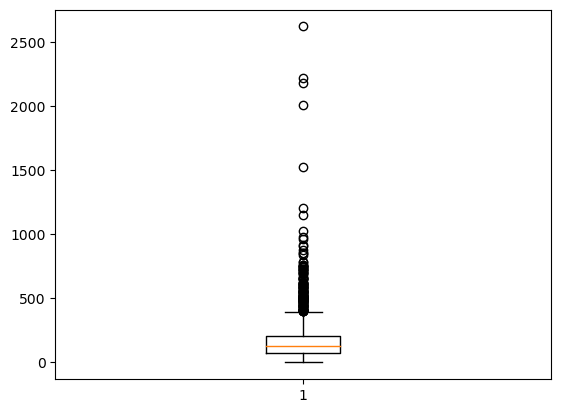

In [30]:
# boxplot pour observer la distribution de "SourceEUI(kBtu/sf)"
col_sourcEUI= df["SourceEUI(kBtu/sf)"]
# Créer le boxplot
plt.boxplot(col_sourcEUI)
# Afficher le graphique
plt.show()

In [31]:
# outliers de la colonne "SourceEUI(kBtu/sf): similaires à SiteEUI
outl_sourcEUI = df.loc[(df["SourceEUI(kBtu/sf)"] > 1500)]
outl_sourcEUI

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
240,365,2016,NonResidential,Other,UW Tower Data Center,4333 BROOKLYN AVE NE,Seattle,WA,98185.0,1142000290,4,NORTHEAST,47.66060,-122.31512,1969,1.0,5,36000,0,36000,Data Center,Data Center,36000.0,NaN,NaN,NaN,NaN,2016201520142013,96.0,834.400024,834.400024,2620.000000,2620.000000,30038490.0,30038490.0,0.0,8803777.0,30038487.0,0.000000,0.0,False,Compliant,209.41,5.82
309,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,100 4th Ave N,Seattle,WA,98109.0,1991200170,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,213834,104922,108912,"Data Center, Financial Office, Office, Other, ...",Parking,104922.0,Data Center,54385.0,Office,37721.0,NaN,100.0,707.299988,707.299988,2217.800049,2217.800049,75073888.0,75073888.0,0.0,21957020.0,74917352.0,1565.250000,156525.0,False,Compliant,530.59,2.48
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.61438,-122.33871,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1496.720215,149672.0,False,Compliant,1921.82,4.48
3171,49709,2016,NonResidential,Other,"Seattle ProCure Management, LLC.",1570 North 115th Street,Seattle,WA,98013.0,3026049128,5,NORTHWEST,47.71286,-122.33635,2012,1.0,2,53575,0,53575,Urgent Care/Clinic/Other Outpatient,Urgent Care/Clinic/Other Outpatient,53575.0,NaN,NaN,NaN,NaN,NaN,NaN,593.599976,593.599976,1527.300049,1527.300049,31803568.0,31803568.0,0.0,6791757.5,23173477.0,86300.890630,8630089.0,False,Compliant,619.90,11.57
3203,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,2020 Fifth Avenue,Seattle,WA,98121.0,0659000905,7,DOWNTOWN,47.61449,-122.33956,1975,1.0,7,90679,35120,55559,"Data Center, Parking",Data Center,60000.0,Parking,30700.0,NaN,NaN,NaN,100.0,694.700012,694.700012,2181.300049,2181.300049,41680640.0,41680640.0,0.0,12215895.0,41680634.0,0.000000,0.0,False,Compliant,290.57,3.20


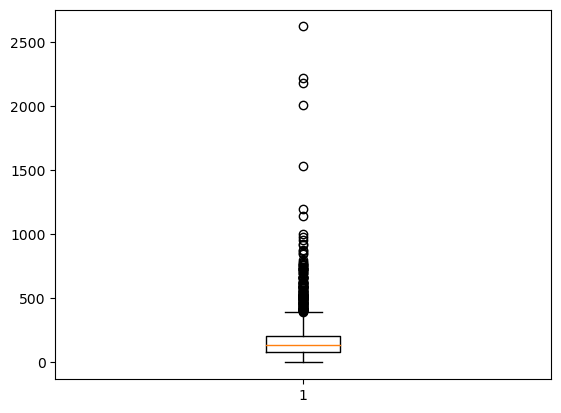

In [32]:
# boxplot pour observer la distribution de "SourceEUIWN(kBtu/sf)"
col_sourcEUIWN= df["SourceEUIWN(kBtu/sf)"]
# Créer le boxplot
plt.boxplot(col_sourcEUIWN)
# Afficher le graphique
plt.show()

In [33]:
# outliers de la colonne "SourceEUIWN(kBtu/sf)": -> les mêmes que SourceEUI
outl_sourcEUIWN = df.loc[(df["SourceEUIWN(kBtu/sf)"] > 1500)]
outl_sourcEUIWN

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
240,365,2016,NonResidential,Other,UW Tower Data Center,4333 BROOKLYN AVE NE,Seattle,WA,98185.0,1142000290,4,NORTHEAST,47.66060,-122.31512,1969,1.0,5,36000,0,36000,Data Center,Data Center,36000.0,NaN,NaN,NaN,NaN,2016201520142013,96.0,834.400024,834.400024,2620.000000,2620.000000,30038490.0,30038490.0,0.0,8803777.0,30038487.0,0.000000,0.0,False,Compliant,209.41,5.82
309,440,2016,NonResidential,Mixed Use Property,Fisher Plaza - West Building,100 4th Ave N,Seattle,WA,98109.0,1991200170,7,LAKE UNION,47.61915,-122.34857,2001,1.0,6,213834,104922,108912,"Data Center, Financial Office, Office, Other, ...",Parking,104922.0,Data Center,54385.0,Office,37721.0,NaN,100.0,707.299988,707.299988,2217.800049,2217.800049,75073888.0,75073888.0,0.0,21957020.0,74917352.0,1565.250000,156525.0,False,Compliant,530.59,2.48
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.61438,-122.33871,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1496.720215,149672.0,False,Compliant,1921.82,4.48
3171,49709,2016,NonResidential,Other,"Seattle ProCure Management, LLC.",1570 North 115th Street,Seattle,WA,98013.0,3026049128,5,NORTHWEST,47.71286,-122.33635,2012,1.0,2,53575,0,53575,Urgent Care/Clinic/Other Outpatient,Urgent Care/Clinic/Other Outpatient,53575.0,NaN,NaN,NaN,NaN,NaN,NaN,593.599976,593.599976,1527.300049,1527.300049,31803568.0,31803568.0,0.0,6791757.5,23173477.0,86300.890630,8630089.0,False,Compliant,619.90,11.57
3203,49780,2016,NonResidential,Other,2020 Fifth Avenue Dat Center,2020 Fifth Avenue,Seattle,WA,98121.0,0659000905,7,DOWNTOWN,47.61449,-122.33956,1975,1.0,7,90679,35120,55559,"Data Center, Parking",Data Center,60000.0,Parking,30700.0,NaN,NaN,NaN,100.0,694.700012,694.700012,2181.300049,2181.300049,41680640.0,41680640.0,0.0,12215895.0,41680634.0,0.000000,0.0,False,Compliant,290.57,3.20


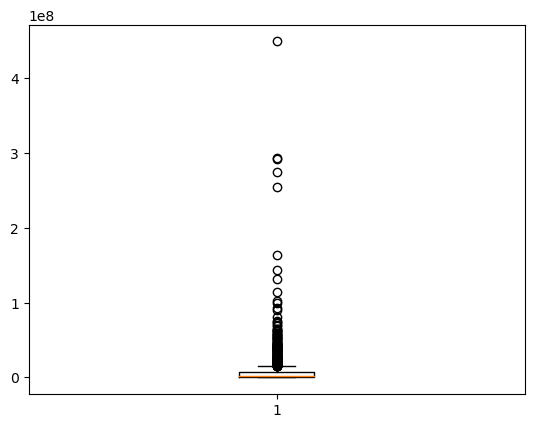

In [34]:
# boxplot pour observer la distribution de "SiteEnergyUse(kBtu)"
col_sitEnerU= df["SiteEnergyUse(kBtu)"]
# Créer le boxplot
plt.boxplot(col_sitEnerU)
# Afficher le graphique
plt.show()

In [35]:
# outliers de la colonne "SiteEnergyUse(kBtu)"
outl_sitEnerU = df.loc[(df["SiteEnergyUse(kBtu)"] > 200000000)]
outl_sitEnerU

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.534930,-122.317880,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,False,Compliant,16870.98,34.09
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,False,Compliant,8145.52,9.27
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,Compliant,10734.57,9.26
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.614380,-122.338710,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1.496720e+03,149672.0,False,Compliant,1921.82,4.48
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,Compliant,12307.16,6.97


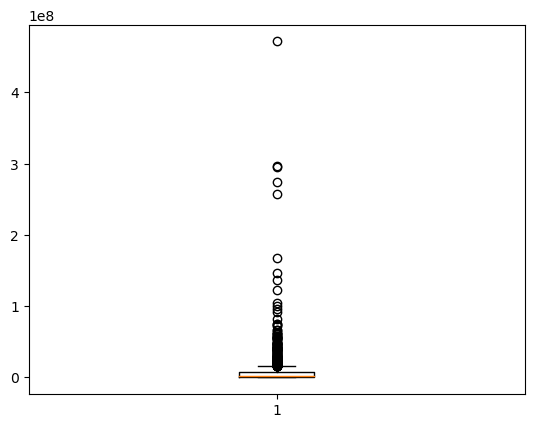

In [36]:
# boxplot pour observer la distribution de "SiteEnergyUseWN(kBtu)"
col_sitEnerUWN= df["SiteEnergyUseWN(kBtu)"]
# Créer le boxplot
plt.boxplot(col_sitEnerUWN)
# Afficher le graphique
plt.show()

In [37]:
# outliers de la colonne "SiteEnergyUseWN(kBtu)"
outl_sitEnerUWN = df.loc[(df["SiteEnergyUseWN(kBtu)"] > 200000000)]
outl_sitEnerUWN

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.534930,-122.317880,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,False,Compliant,16870.98,34.09
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,False,Compliant,8145.52,9.27
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,Compliant,10734.57,9.26
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.614380,-122.338710,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.000000,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1.496720e+03,149672.0,False,Compliant,1921.82,4.48
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,Compliant,12307.16,6.97


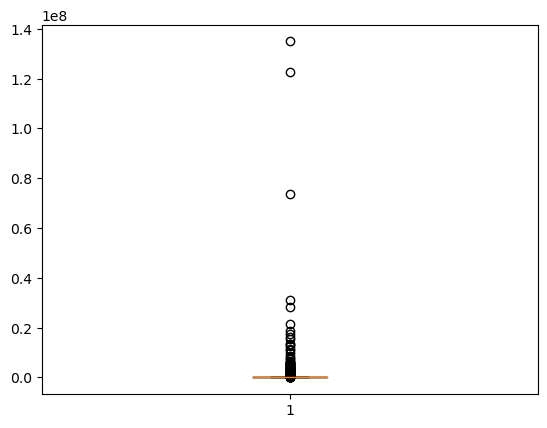

In [38]:
# boxplot pour observer la distribution de "SteamUse(kBtu)"
col_steamU= df["SteamUse(kBtu)"]
# Créer le boxplot
plt.boxplot(col_steamU)
# Afficher le graphique
plt.show()

In [39]:
# outliers de la colonne "SteamUse(kBtu)"
outl_steamU = df.loc[(df["SteamUse(kBtu)"] > 60000000)]
outl_steamU

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,18321.29102,1832129.0,False,Compliant,10734.57,9.26
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,173161.20310,17316120.0,False,Compliant,12307.16,6.97
3264,49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,925 Seneca St.,Seattle,WA,98101.0,1979200210,3,EAST,47.609860,-122.327740,1920,1.0,8,374466,0,374466,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1010135.0,NaN,NaN,NaN,NaN,NaN,74.0,162.300003,165.500000,367.899994,369.399994,163945984.0,167207104.0,73885472.0,26395222.0,90060497.0,0.00000,0.0,False,Compliant,6330.91,16.91


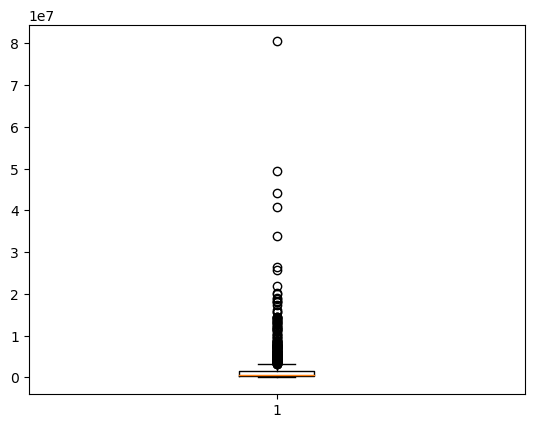

In [40]:
# boxplot pour observer la distribution de "Electricity(kWh)"
col_elec= df["Electricity(kWh)"]
# Créer le boxplot
plt.boxplot(col_elec)
# Afficher le graphique
plt.show()

In [41]:
# outliers de la colonne "Electricity(kWh)"
outl_elec = df.loc[(df["Electricity(kWh)"] > 75000000)]
outl_elec

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
558,753,2016,NonResidential,Other,WestinBuilding,2001 6th Ave,Seattle,WA,98121.0,0659000950,7,DOWNTOWN,47.61438,-122.33871,1981,1.0,33,429405,0,429405,"Data Center, Office",Data Center,218997.0,Office,210409.0,NaN,NaN,NaN,98.0,639.700012,639.799988,2007.900024,2008.0,274682208.0,274725984.0,0.0,80460872.0,274532495.0,1496.720215,149672.0,False,Compliant,1921.82,4.48


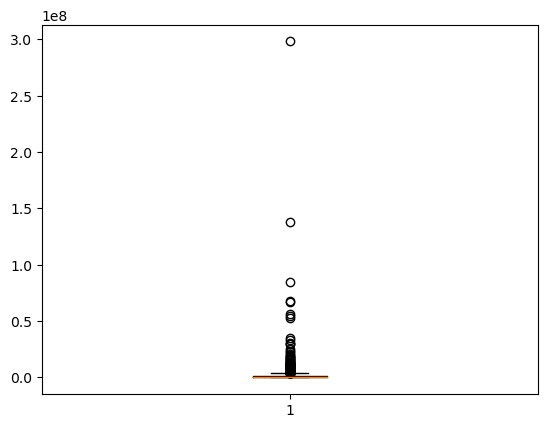

In [42]:
# boxplot pour observer la distribution de "NaturalGas(kBtu)"
col_gaskBtu= df["NaturalGas(kBtu)"]
# Créer le boxplot
plt.boxplot(col_gaskBtu)
# Afficher le graphique
plt.show()

In [43]:
# outliers de la colonne "NaturalGas(kBtu)"
outl_gaskBtu = df.loc[(df["NaturalGas(kBtu)"] > 100000000)]
outl_gaskBtu

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2979090.000,297909000.0,False,Compliant,16870.98,34.09
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.66231,-122.28146,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1381912.375,138191238.0,False,Compliant,8145.52,9.27


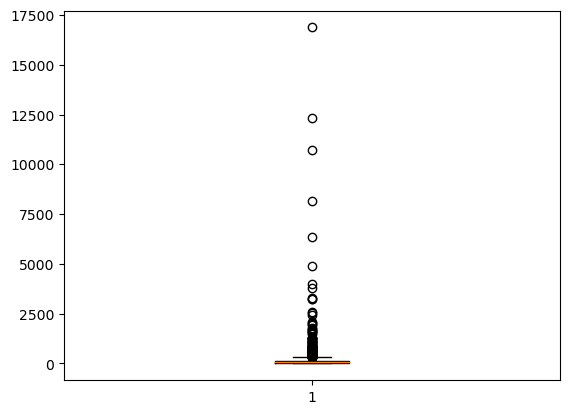

In [44]:
# boxplot pour observer la distribution de "TotalGHGEmissions"
col_ghgEm= df["TotalGHGEmissions"]
# Créer le boxplot
plt.boxplot(col_ghgEm)
# Afficher le graphique
plt.show()

In [45]:
# outliers de la colonne "TotalGHGEmissions"
outl_ghgEm = df.loc[(df["TotalGHGEmissions"] > 10000)]
outl_ghgEm

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.534930,-122.317880,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,False,Compliant,16870.98,34.09
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,Compliant,10734.57,9.26
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,Compliant,12307.16,6.97


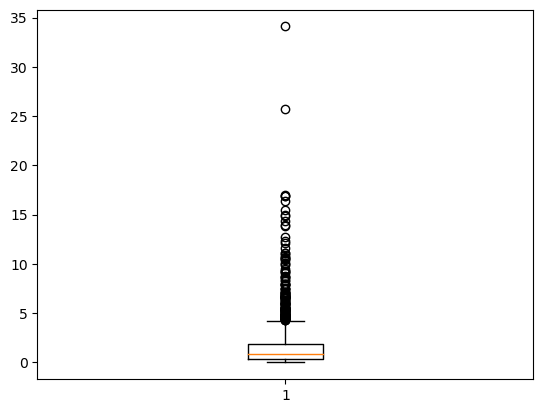

In [46]:
# boxplot pour observer la distribution de "GHGEmissionsIntensity"
col_ghgEmint= df["GHGEmissionsIntensity"]
# Créer le boxplot
plt.boxplot(col_ghgEmint)
# Afficher le graphique
plt.show()

In [47]:
# outliers de la colonne "TotalGHGEmissions"
outl_ghgEmint = df.loc[(df["GHGEmissionsIntensity"] > 25)]
outl_ghgEmint

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1.0,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,False,Compliant,16870.98,34.09
809,19900,2016,NonResidential,Laboratory,3000/3018 Western,3018 Western Ave.,Seattle,WA,98121.0,0695000090,7,DOWNTOWN,47.61763,-122.35507,1926,0.0,4,49249,0,49249,"Laboratory, Office",Laboratory,40584.0,Office,7165.0,NaN,NaN,NaN,NaN,696.700012,693.099976,1206.699951,1195.099976,33268410.0,33092532.0,0.0,3181345.0,10854749.0,2.241366e+05,22413661.0,False,Compliant,1266.06,25.71


### => index à revoir: 124, 170, 618 notamment: hôpitaux

In [48]:
# suppression des outliers de SiteEnergyUse(kBtu) et PropertyGFATotal: index 35, 558, 1494, 559 
ind_remove = [35, 558, 1494, 559]
df.drop(index=ind_remove, axis=0, inplace=True)

## Vérification sommes colonnes

### SiteEnergyUse = SteamUse + Electricity + NaturalGas (unité=kBtu)

In [49]:
# création de la nouvelle colonne SiteEnergyUse2 pour comparer avec SiteEnergyUse
df["SiteEnergyUse2(kBtu)"] = df["SteamUse(kBtu)"] + df["Electricity(kBtu)"] + df["NaturalGas(kBtu)"]

In [50]:
# Quelles entités-buildings ont une SiteEnergyUse2 == 0?: 5 lignes
SEU0_rows = df.loc[df['SiteEnergyUse2(kBtu)'] == 0].index
SEU0_rows

Int64Index([28, 152, 513, 746, 1361], dtype='int64')

In [51]:
# suppression de ces 5 lignes, comme il n'y a aucune info pour la variable-cible
df.drop(SEU0_rows, axis=0, inplace=True) # c'est bon au niveau du nombre de lignes

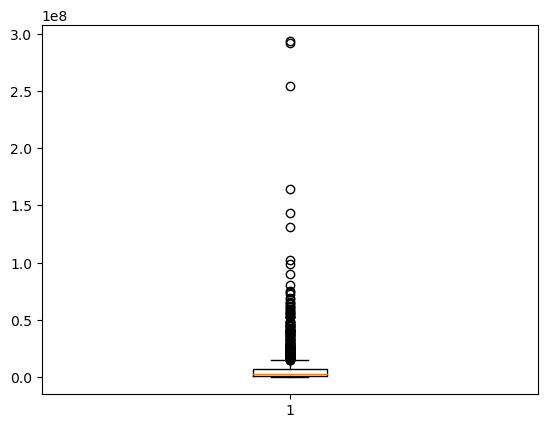

In [52]:
# boxplot pour distribution de SiteEnergyUse2
col_SEU2= df["SiteEnergyUse2(kBtu)"]
# Créer le boxplot
plt.boxplot(col_SEU2)
# Afficher le graphique
plt.show()

In [53]:
# Quelles entités-buildings ont une SiteEnergyUse2 > 2 (le8)?: 5 lignes
SEU2_rows = df.loc[df['SiteEnergyUse2(kBtu)'] > 200000000]
SEU2_rows

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu)
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6.0,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,False,Compliant,8145.52,9.27,253832448.0
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9.0,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,False,Compliant,10734.57,9.26,293090763.0
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7.0,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,False,Compliant,12307.16,6.97,291614404.0


### => on retrouve des index présents dans les outliers précédents: 35, 124, 170, 558, 618

In [54]:
# Différence entre "SiteEnergyUse(kBtu)" et "SiteEnergyUse2(kBtu)"
df["Diff_SiteEnergyUse"] = df["SiteEnergyUse2(kBtu)"] - df["SiteEnergyUse(kBtu)"]

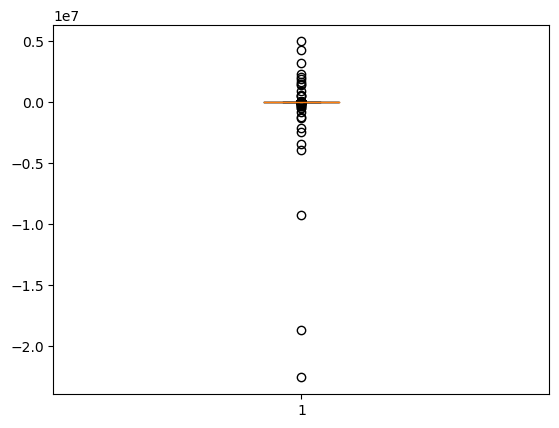

In [55]:
# boxplot pour distribution de Diff_SiteEnergyUse
col_DiffSEU2= df["Diff_SiteEnergyUse"]
# Créer le boxplot
plt.boxplot(col_DiffSEU2)
# Afficher le graphique
plt.show()

### => attention: index 448, 601, 3277

### PropertyGFATotal = PropertyGFAParking +PropertyGFABuilding(s)

In [56]:
# création de la nouvelle colonne PropertyGFATotal2 pour comparer avec PropertyGFATotal
df["PropertyGFATotal2"] = df["PropertyGFAParking"] + df["PropertyGFABuilding(s)"]

In [57]:
df['Diff_PropGFATo'] = df["PropertyGFATotal2"] - df["PropertyGFATotal"]
df['Diff_PropGFATo'].unique()

array([0], dtype=int64)

### => pas de différence pour PropertyGFATotal et PropertyGFATotal2

### Vérification PropertyGFATotal = LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA

In [58]:
# suppression des Nan dans ces colonnes
df['LargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
df['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

In [59]:
df['AllUseTypeGFA'] = df['LargestPropertyUseTypeGFA'] + df['SecondLargestPropertyUseTypeGFA'] + df['ThirdLargestPropertyUseTypeGFA']

In [60]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83,7.226362e+06,-0.5000,88434,0,88434.0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86,8.387933e+06,0.0000,103566,0,103566.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,0.0,NaN,0.0,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19,7.258702e+07,-6.0000,956110,0,756493.0
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67,6.794583e+06,-0.7500,61320,0,61320.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88,1.417260e+07,-1.0000,175580,0,191454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,0.0,NaN,0.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70,8.497459e+05,0.1969,12294,0,12294.0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,0.0,NaN,0.0,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,32.17,2.01,9.502760e+05,-0.1550,16000,0,16000.0
3

In [61]:
df['Diff_sfGFA'] = df['AllUseTypeGFA'] - df['PropertyGFATotal']
df['Diff_sfGFA']

0            0.0
1            0.0
2      -199617.0
3            0.0
4        15874.0
          ...   
3371         0.0
3372         0.0
3373         0.0
3374      -515.0
3375      -879.0
Name: Diff_sfGFA, Length: 1651, dtype: float64

In [62]:
sf_nonnul = df[df['Diff_sfGFA'] != 0]
sf_nonnul
# différences qui dépendent de: parking, renseignement de chaque surface de TypeUse

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,0.0,NaN,0.0,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.0,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19,7.258702e+07,-6.0000,956110,0,756493.0,-199617.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.0,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88,1.417260e+07,-1.0000,175580,0,191454.0,15874.0
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,0.0,NaN,0.0,NaN,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.0,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,Compliant,301.81,3.10,1.208662e+07,0.0000,97288,0,88830.0,-8458.0
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,83008,Hotel,Hotel,81352.0,NaN,0.0,NaN,0.0,NaN,27.0,70.800003,74.500000,146.600006,154.699997,5.758795e+06,6.062768e+06,0.0,8.239199e+05,2.811215e+06,29475.800780,2.947580e+06,False,Compliant,176.14,2.12,5.758795e+06,0.0000,83008,0,81352.0,-1656.0
10,15,2016,NonResidential,Hotel,Hotel Monaco Seattle,1101 4th Avenue,Seattle,WA,98101.0,0942000145,7,DOWNTOWN,47.60695,-122.33414,1969,1.0,11,153163,19279,133884,Hotel,Hotel,133884.0,NaN,0.0,NaN,0.0,NaN,30.0,119.599998,124.300003,228.199997,233.000000,1.601664e+07,1.664693e+07,5237165.5,1.813490e+06,6.187627e+06,45918.500000,4.591850e+06,False,Compliant,691.26,4.51,1.601664e+07,-1.5000,153163,0,133884.0,-19279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,50196,2016,Nonresidential COS,Mixed Use Property,Northgate Community Center,10510 5th Ave NE,Seattle,WA,NaN,2926049431,5,NORTH,47.70541,-122.32232,2005,1.0,1,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,Fitness Center/Health Club/Gym,8577.0,Pre-school/Daycare,1364.0,NaN,NaN,30.900000,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.0,1.866839e+05,6.369655e+05,0.000000,0.000000e+00,False,Compliant,4.44,0.22,6.369655e+05,-0.0119,20616,0,19841.0,-775.0
3364,50207,2016,Nonresidential COS,Other,Ballard Community Center,6020 28th ave NW,Seattle,WA,NaN,6658000065,6,BALLARD,47.67295,-122.39228,1911,1.0,1,16795,0,16795,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8680.0,Fitness Center/Health Club/Gym,7014.0,Pre-school/Daycare,535.0,N

In [63]:
df['Diff_sfGFABuild'] = df['AllUseTypeGFA'] - df["PropertyGFABuilding(s)"]
df['Diff_sfGFABuild']

0           0.0
1       15064.0
2       -2899.0
3           0.0
4       77874.0
         ...   
3371        0.0
3372        0.0
3373        0.0
3374     -515.0
3375     -879.0
Name: Diff_sfGFABuild, Length: 1651, dtype: float64

In [64]:
sf_nonnulbuild = df[df['Diff_sfGFABuild'] != 0]
sf_nonnulbuild

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86,8.387933e+06,0.0000,103566,0,103566.0,0.0,15064.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,0.0,NaN,0.0,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.0,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19,7.258702e+07,-6.0000,956110,0,756493.0,-199617.0,-2899.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.0,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88,1.417260e+07,-1.0000,175580,0,191454.0,15874.0,77874.0
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,7,DOWNTOWN,47.61623,-122.33657,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,0.0,NaN,0.0,NaN,NaN,136.100006,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.0,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,Compliant,301.81,3.10,1.208662e+07,0.0000,97288,0,88830.0,-8458.0,28740.0
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,DOWNTOWN,47.61390,-122.33283,1926,1.0,11,83008,0,83008,Hotel,Hotel,81352.0,NaN,0.0,NaN,0.0,NaN,27.0,70.800003,74.500000,146.600006,154.699997,5.758795e+06,6.062768e+06,0.0,8.239199e+05,2.811215e+06,29475.800780,2.947580e+06,False,Compliant,176.14,2.12,5.758795e+06,0.0000,83008,0,81352.0,-1656.0,-1656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,50196,2016,Nonresidential COS,Mixed Use Property,Northgate Community Center,10510 5th Ave NE,Seattle,WA,NaN,2926049431,5,NORTH,47.70541,-122.32232,2005,1.0,1,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,9900.0,Fitness Center/Health Club/Gym,8577.0,Pre-school/Daycare,1364.0,NaN,NaN,30.900000,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.0,1.866839e+05,6.369655e+05,0.000000,0.000000e+00,False,Compliant,4.44,0.22,6.369655e+05,-0.0119,20616,0,19841.0,-775.0,-775.0
3364,50207,2016,Nonresidential COS,Other,Ballard Community Center,6020 28th ave NW,Seattle,WA,NaN,6658000065,6,BALLARD,47.67295,-122.39228,1911,1.0,1,16795,0,16795,"Fitness Center/Health Club/Gym, Food Service, ...",Other

## Nouvelle variable: SiteEnergyUseWN(kBtu) / PropertyGFATotal

In [65]:
# création de la nouvelle colonne "ratio_SEU2_PropGFATot": variable pour l'analyse "univariée"
df["ratio_SEUWN_PropGFATot"] = df["SiteEnergyUseWN(kBtu)"] / df["PropertyGFATotal"]

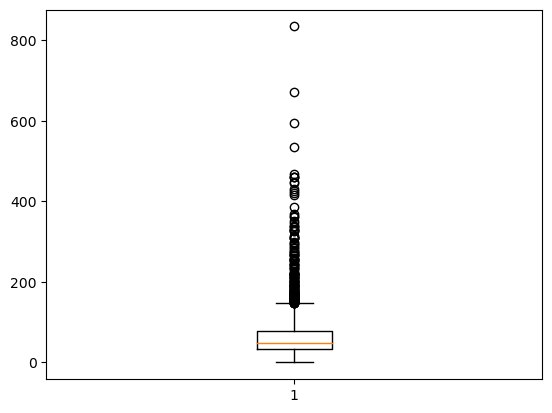

In [66]:
# boxplot pour distribution de ratio_SEUWN_PropGFATot
col_R_SEUWN_GFATot= df["ratio_SEUWN_PropGFATot"]
# Créer le boxplot
plt.boxplot(col_R_SEUWN_GFATot)
# Afficher le graphique
plt.show()

In [67]:
# Quelles entités-buildings ont un ratio_SEUWN_PropGFATot > 800 ?: 5 lignes
SEU2_ind = df.loc[df['ratio_SEUWN_PropGFATot'] > 800].index
SEU2_ind

Int64Index([240], dtype='int64')

## Vérification variables

### NumberofBuildings

In [68]:
# dans colonne 'NumberofBuildings', remplacer les valeurs '0' par '1'
zero_nbbuild = df.loc[df['NumberofBuildings'] == 0]
zero_nbbuild

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ratio_SEUWN_PropGFATot
63,89,2016,NonResidential,Medical Office,Polyclinic North && South,1200 Harvard Ave,Seattle,WA,98122.0,1978201270,3,EAST,47.612440,-122.321400,1965,0.0,3,179014,0,179014,Medical Office,Medical Office,179014.0,NaN,0.0,NaN,0.0,NaN,48.0,93.300003,92.300003,213.399994,210.300003,1.670106e+07,1.652771e+07,0.000000e+00,2.897563e+06,9886484.0,68145.703130,6814570.0,False,Compliant,430.84,2.41,1.670105e+07,-1.0000,179014,0,179014.0,0.0,0.0,92.326360
76,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,401 Mercer St,Seattle,WA,98109.0,1988200705,7,MAGNOLIA / QUEEN ANNE,47.623910,-122.348370,1986,0.0,2,66240,2352,63888,"Data Center, Distribution Center, Office, Park...",Office,45900.0,Data Center,5181.0,Distribution Center,4551.0,NaN,NaN,74.900002,75.400002,235.199997,236.600006,4.166306e+06,4.192108e+06,0.000000e+00,1.221074e+06,4166305.0,0.000000,0.0,False,Compliant,29.04,0.44,4.166305e+06,-1.2500,66240,0,55632.0,-10608.0,-8256.0,63.286651
160,257,2016,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,3235 16TH AVE SW,Seattle,WA,98134.0,7666703020,1,GREATER DUWAMISH,47.575070,-122.357470,1916,0.0,4,79600,0,79600,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,79600.0,NaN,0.0,NaN,0.0,NaN,34.0,30.299999,30.299999,95.099998,95.099998,2.411402e+06,2.411402e+06,0.000000e+00,7.067415e+05,2411402.0,0.000000,0.0,False,Compliant,16.81,0.21,2.411402e+06,-0.2500,79600,0,79600.0,0.0,0.0,30.293998
201,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,Seattle,WA,98121.0,0656000005,7,DOWNTOWN,47.617570,-122.351220,1968,0.0,3,100734,26731,74003,Office,Office,100734.0,NaN,0.0,NaN,0.0,NaN,20.0,97.199997,98.199997,305.100006,308.399994,9.788717e+06,9.892566e+06,0.000000e+00,2.868908e+06,9788716.0,0.000000,0.0,False,Compliant,68.24,0.68,9.788716e+06,-1.0000,100734,0,100734.0,0.0,26731.0,98.204837
241,366,2016,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,1107 NE 45th St,Seattle,WA,98105.0,1142000500,4,NORTHEAST,47.661000,-122.316260,1961,0.0,5,99005,0,99005,Office,Office,79555.0,NaN,0.0,NaN,0.0,NaN,70.0,59.400002,63.000000,137.600006,140.699997,4.728488e+06,5.008124e+06,0.000000e+00,8.391593e+05,2863212.0,18652.765630,1865277.0,False,Compliant,119.03,1.20,4.728489e+06,0.5000,99005,0,79555.0,-19450.0,-19450.0,50.584551
264,391,2016,NonResidential,Mixed Use Property,Thaw Building,8300 Military Rd South,Seattle,WA,98108.0,0007400015,2,GREATER DUWAMISH,47.528710,-122.294430,1970,0.0,1,88400,0,88400,"Distribution Center, Non-Refrigerated Warehous...",Non-Refrigerated Warehouse,33450.0,Office,29620.0,Distribution Center,27715.0,NaN,42.0,48.299999,53.000000,109.000000,113.900002,4.383100e+06,4.811200e+06,0.000000e+00,7.416934e+05,2530658.0,18524.421880,1852442.0,False,Compliant,116.03,1.31,4.383100e+06,-0.5000,88400,0,90785.0,2385.0,2385.0,54.425339
278,408,2016,NonResidential,Large Office,Fourth and Pike Building,1424 4th Ave,Seattle,WA,98101.0,1975700235,7,DOWNTOWN,47.610050,-122.336100,1926,0.0,10,132326,0,132326,"Office, Other, Retail Store",Office,9200

In [69]:
df['NumberofBuildings'] = df['NumberofBuildings'].replace({0 : 1})

In [70]:
df['NumberofBuildings'].unique()

array([ 1.,  3.,  2.,  4., 27.,  6., 11., 14.,  9.,  5.,  7.,  8., 23.,
       10.])

### NumberofFloors

In [71]:
df['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  3,
        4, 24, 20, 34,  1,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 27, 99, 39], dtype=int64)

In [72]:
df['NumberofFloors'] = df['NumberofFloors'] + 1

In [73]:
df['NumberofFloors'].unique()

array([ 13,  12,  42,  11,  19,   3,   9,  16,  26,  10,  34,   7,  29,
         6,  20,   8,   4,   5,  25,  21,  35,   2,   1,  17,  24,  18,
        37,  23,  48,  30,  15,  50,  38,  43,  64,  14,  22,  56,  47,
        31,  57,  28, 100,  40], dtype=int64)

In [74]:
# calcul surface par étages
# (NumberofBuildings * NumberofFloors) / PropertyGFATotal
# nouvelle colonne Sf/Floor
df['Sf_Floor'] = (df['NumberofBuildings'] * df['NumberofFloors']) / df['PropertyGFATotal']

In [75]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ratio_SEUWN_PropGFATot,Sf_Floor
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,13,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83,7.226362e+06,-0.5000,88434,0,88434.0,0.0,0.0,84.321754,0.000147
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,12,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,295.86,2.86,8.387933e+06,0.0000,103566,0,103566.0,0.0,15064.0,83.661424,0.000116
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,42,956110,196718,759392,Hotel,Hotel,756493.0,NaN,0.0,NaN,0.0,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,2089.28,2.19,7.258702e+07,-6.0000,956110,0,756493.0,-199617.0,-2899.0,77.331177,0.000044
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,11,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,286.43,4.67,6.794583e+06,-0.7500,61320,0,61320.0,0.0,0.0,113.287679,0.000179
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,19,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,505.01,2.88,1.417260e+07,-1.0000,175580,0,191454.0,15874.0,77874.0,83.474786,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,2,12294,0,12294,Office,Office,12294.0,NaN,0.0,NaN,0.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,20.94,1.70,8.497459e+05,0.1969,12294,0,12294.0,0.0,0.0,76.704343,0.000163
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,2,16000,0,16000

### Fonctions des bâtiments

In [76]:
# Nombre d'entités-buildings en fonction du PrimaryPropertyType
nb_priproptypes = df['PrimaryPropertyType'].value_counts()
nb_priproptypes

Small- and Mid-Sized Office    291
Other                          247
Warehouse                      187
Large Office                   171
K-12 School                    136
Mixed Use Property             112
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
University                      22
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [77]:
# c'est quoi les surfaces des trois bâtiments "Office": pour les classer dans "small-mid size" ou "large size"
sf_office = df.loc[(df["PrimaryPropertyType"] == "Office")]
sf_office

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ratio_SEUWN_PropGFATot,Sf_Floor
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,2,13661,0,13661,Office,Office,13661.0,NaN,0.0,NaN,0.0,NaN,75.0,36.799999,40.900002,115.500000,128.399994,502667.6875,558525.1250,0.0,147323.50000,502667.7820,0.000000,0.0000,True,Error - Correct Default Data,3.50,0.26,502667.7820,0.0945,13661,0,13661.0,0.0,0.0,40.884644,0.000146
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,2,SOUTHEAST,47.56440,-122.27813,1960,1.0,2,15398,0,15398,Office,Office,15398.0,NaN,0.0,NaN,0.0,NaN,93.0,25.200001,26.900000,64.099998,66.699997,387810.0000,414172.4063,0.0,81341.39844,277536.8515,1102.729980,110272.9980,True,Error - Correct Default Data,7.79,0.51,387809.8495,-0.1505,15398,0,15398.0,0.0,0.0,26.897805,0.000130
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,2,12294,0,12294,Office,Office,12294.0,NaN,0.0,NaN,0.0,NaN,46.0,69.099998,76.699997,161.699997,176.100006,849745.6875,943003.1875,0.0,153655.00000,524270.8600,3254.750244,325475.0244,True,Error - Correct Default Data,20.94,1.70,849745.8844,0.1969,12294,0,12294.0,0.0,0.0,76.704343,0.000163


In [78]:
# moyenne des surfaces des "Small- and Mid-Sized Office"
average_gfa_SMoffice = df.loc[df['PrimaryPropertyType'] == 'Small- and Mid-Sized Office', "PropertyGFABuilding(s)"].mean()
average_gfa_SMoffice

42967.50515463918

In [79]:
#=> Les 3 "Office" rentrent dans la catégorie 'Small- and Mid-Sized Office', parce que leur surface est bien inférieure à la moyenne des surfaces de cette catégorie
df.loc[df['PrimaryPropertyType'] == 'Office', 'PrimaryPropertyType'] = 'Small- and Mid-Sized Office'
df.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

#### Tableaux sur les fonctions des bâtiments et leur surface

In [80]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType        805
SecondLargestPropertyUseTypeGFA       0


In [81]:
columns_nan = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
# Replace NaN values with 'non-renseigné' in the specified columns
df[columns_nan] = df[columns_nan].fillna('non-renseigné')

In [82]:
df_dum1 = pd.get_dummies(df, columns = ['LargestPropertyUseType'], drop_first = ['Other - Lodging/Residential'],dtype='int')

In [83]:
df_dum1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,13,88434,0,88434,Hotel,88434.0,non-renseigné,0.0,non-renseigné,0.0,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,249.98,2.83,7.226362e+06,-0.5000,88434,0,88434.0,0.0,0.0,84.321754,0.000147,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,12,103566,15064,88502,"Hotel, Parking, Restaurant",83880.0,

In [84]:
df_dum1.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber',
       ...
       'LargestPropertyUseType_Retail Store',
       'LargestPropertyUseType_Self-Storage Facility',
       'LargestPropertyUseType_Senior Care Community',
       'LargestPropertyUseType_Social/Meeting Hall',
       'LargestPropertyUseType_Strip Mall',
       'LargestPropertyUseType_Supermarket/Grocery Store',
       'LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient',
       'LargestPropertyUseType_Wholesale Club/Supercenter',
       'LargestPropertyUseType_Worship Facility',
       'LargestPropertyUseType_non-renseigné'],
      dtype='object', length=107)

In [85]:
# suppression des colonnes de df_dum1 qui ne servent à rien
df_dum1.drop(["DataYear", 'BuildingType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'ListOfAllPropertyUseTypes', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus'], axis=1, inplace=True)

In [86]:
df_dum1

,OSEBuildingID,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné
0,1,Hotel,1927,1.0,13,88434,0,88434,88434.0,non-renseigné,0.0,non-renseigné,0.0,7.226362e+06,7.456910e+06,249.98,2.83,7.226362e+06,-0.5000,88434,0,88434.0,0.0,0.0,84.321754,0.000147,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Hotel,1996,1.0,12,103566,15064,88502,83880.0,Parking,15064.0,Restaurant,4622.0,8.387933e+06,8.664479e+06,295.86,2.86,8.387933e+06,0.0000,103566,0,103566.0,0.0,15064.0,83.661424,0.000116,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Hotel,1969,1.0,42,956110,196718,759392,756493.0,non-renseigné,0.0,non-renseigné,0.0,7.258702e+07,7.393711e+07,2089.28,2.19,7.258702e+07,-6.0000,956110,0,756493.0,-199617.0,-2899.0,77.331177,0.000044,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,Hotel,1926,1.0,11,61320,0,61320,61320.0,non-renseigné,0.0,non-renseigné,0.0,6.794584e+06,6.946800e+06,286.43,4.67,6.794583e+06,-0.7500,61320,0,61320.0,0.0,0.0,113.287679,0.000179,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [87]:
df_dum2 = pd.get_dummies(df, columns = ['SecondLargestPropertyUseType'], drop_first = ['Multifamily Housing'],dtype='int')

In [88]:
df_dum2.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'SiteE

In [89]:
# suppression des colonnes de df_dum2 qui ne servent à rien
df_dum2.drop(['PrimaryPropertyType', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'SiteEnergyUse2(kBtu)', 'Diff_SiteEnergyUse', 'PropertyGFATotal2',
       'Diff_PropGFATo', 'ratio_SEUWN_PropGFATot', 'Sf_Floor'], axis=1, inplace=True)

In [90]:
df_dum2.head(5)

,OSEBuildingID,DataYear,BuildingType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,ListOfAllPropertyUseTypes,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Entertainment/Public Assembly,SecondLargestPropertyUseType_Other - Lodging/Residential,SecondLargestPropertyUseType_Other - Public Services,SecondLargestPropertyUseType_Other - Recreation,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Other - Services,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Performing Arts,"SecondLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",SecondLargestPropertyUseType_Pre-school/Daycare,SecondLargestPropertyUseType_Refrigerated Warehouse,"SecondLargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",SecondLargestPropertyUseType_Residence Hall/Dormitory,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Vocational School,SecondLargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_non-renseigné
0,1,2016,NonResidential,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,Hotel,NaN,60.0,81.699997,84.300003,182.500000,189.000000,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,88434.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2016,NonResidential,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,"Hotel, Parking, Restaurant",NaN,61.0,94.800003,97.900002,176.100006,179.399994,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,103566.0,0.0,15064.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2016,NonResidential,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,Hotel,NaN,43.0,96.000000,97.699997,241.899994,244.100006,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,756493.0,-199617.0,-2899.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5,2016,NonResidential,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,Hotel,NaN,56.0,1

In [91]:
df_dum3 = pd.get_dummies(df, columns = ['ThirdLargestPropertyUseType'], drop_first = ['Convenience Store without Gas Station'],dtype='int')

In [92]:
df_dum3.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Site

In [93]:
# suppression des colonnes de df_dum3 qui ne servent à rien
df_dum3.drop(['PrimaryPropertyType', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'SiteEnergyUse2(kBtu)', 'Diff_SiteEnergyUse', 'PropertyGFATotal2',
       'Diff_PropGFATo', 'ratio_SEUWN_PropGFATot','Sf_Floor'], axis=1, inplace=True)

In [94]:
df_dum3

,OSEBuildingID,DataYear,BuildingType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,ListOfAllPropertyUseTypes,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ThirdLargestPropertyUseType_Bar/Nightclub,ThirdLargestPropertyUseType_Convenience Store without Gas Station,ThirdLargestPropertyUseType_Data Center,ThirdLargestPropertyUseType_Distribution Center,ThirdLargestPropertyUseType_Fast Food Restaurant,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym,ThirdLargestPropertyUseType_Food Service,ThirdLargestPropertyUseType_Hotel,ThirdLargestPropertyUseType_K-12 School,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Other - Utility,ThirdLargestPropertyUseType_Other/Specialty Hospital,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_non-renseigné
0,1,2016,NonResidential,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,Hotel,NaN,60.0,81.699997,84.300003,182.500000,189.000000,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,88434.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2016,NonResidential,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,"Hotel, Parking, Restaurant",NaN,61.0,94.800003,97.900002,176.100006,179.399994,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,103566.0,0.0,15064.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,2016,NonResidential,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,Hotel,NaN,43.0,96.000000,97.699997,241.899994,244.100006,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,756493.0,-199617.0,-2899.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5,2016,NonResidential,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,Hotel,NaN,56.0,110.800003,113.300003,216.199997,224.000000,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,61320.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8,2016,NonResidential,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,"Hotel, Parking, Swimming Pool",NaN,75.0,114.800003,118.699997,211.399994,215.600006,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+0

In [95]:
# Concaténer les 3 tableaux df_dum
data = pd.concat([df_dum1, df_dum2, df_dum3], axis=1)

In [96]:
data.head(5)

,OSEBuildingID,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné,OSEBuildingID,DataYear,BuildingType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,ListOfAllPropertyUseTypes,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,AllUseTypeGFA,Diff_sfGFA,Diff_sfGFABuild,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),Se

In [97]:
duplicate_columns = data.columns[data.columns.duplicated()]
duplicate_columns

Index(['OSEBuildingID', 'AllUseTypeGFA', 'Diff_sfGFA', 'Diff_sfGFABuild',
       'OSEBuildingID', 'DataYear', 'BuildingType', 'PropertyName', 'Address',
       'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'ListOfAllPropertyUseTypes', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'AllUseTypeGFA',
       'Diff_sfGFA', 'Diff_sfGFABuild'],
      dtype='object')

In [98]:
# Drop the duplicate columns using DataFrame indexing
data = data.drop(columns=duplicate_columns)
data

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType

In [99]:
col_LPUT1 = ["LargestPropertyUseType_Automobile Dealership","LargestPropertyUseType_Bank Branch","LargestPropertyUseType_College/University","LargestPropertyUseType_Courthouse","LargestPropertyUseType_Data Center","LargestPropertyUseType_Distribution Center","LargestPropertyUseType_Financial Office","LargestPropertyUseType_Fire Station","LargestPropertyUseType_Fitness Center/Health Club/Gym","LargestPropertyUseType_Food Service","LargestPropertyUseType_Hospital (General Medical & Surgical)","LargestPropertyUseType_Hotel","LargestPropertyUseType_K-12 School","LargestPropertyUseType_Laboratory","LargestPropertyUseType_Library","LargestPropertyUseType_Lifestyle Center","LargestPropertyUseType_Manufacturing/Industrial Plant","LargestPropertyUseType_Medical Office","LargestPropertyUseType_Movie Theater","LargestPropertyUseType_Multifamily Housing","LargestPropertyUseType_Museum","LargestPropertyUseType_Non-Refrigerated Warehouse","LargestPropertyUseType_Office","LargestPropertyUseType_Other","LargestPropertyUseType_Other - Education","LargestPropertyUseType_Other - Entertainment/Public Assembly","LargestPropertyUseType_Other - Lodging/Residential","LargestPropertyUseType_Other - Mall","LargestPropertyUseType_Other - Public Services","LargestPropertyUseType_Other - Recreation","LargestPropertyUseType_Other - Restaurant/Bar","LargestPropertyUseType_Other - Services","LargestPropertyUseType_Other - Utility","LargestPropertyUseType_Other/Specialty Hospital","LargestPropertyUseType_Parking","LargestPropertyUseType_Performing Arts","LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)","LargestPropertyUseType_Police Station","LargestPropertyUseType_Pre-school/Daycare","LargestPropertyUseType_Prison/Incarceration","LargestPropertyUseType_Refrigerated Warehouse","LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)","LargestPropertyUseType_Residence Hall/Dormitory","LargestPropertyUseType_Residential Care Facility","LargestPropertyUseType_Restaurant","LargestPropertyUseType_Retail Store","LargestPropertyUseType_Self-Storage Facility","LargestPropertyUseType_Senior Care Community","LargestPropertyUseType_Social/Meeting Hall","LargestPropertyUseType_Strip Mall","LargestPropertyUseType_Supermarket/Grocery Store","LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient","LargestPropertyUseType_Wholesale Club/Supercenter","LargestPropertyUseType_Worship Facility", "LargestPropertyUseType_non-renseigné"]

# Utilisez l'indexation booléenne pour remplacer les valeurs 1 par les valeurs de 'LargestPropertyUseTypeGFA'
for col in col_LPUT1:
    data.loc[data[col] == 1, col] = data['LargestPropertyUseTypeGFA']

In [100]:
data

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType

In [101]:
col_LPUT2 = ["SecondLargestPropertyUseType_Automobile Dealership","SecondLargestPropertyUseType_Bank Branch","SecondLargestPropertyUseType_Bar/Nightclub","SecondLargestPropertyUseType_College/University","SecondLargestPropertyUseType_Convenience Store without Gas Station","SecondLargestPropertyUseType_Courthouse","SecondLargestPropertyUseType_Data Center","SecondLargestPropertyUseType_Distribution Center","SecondLargestPropertyUseType_Enclosed Mall","SecondLargestPropertyUseType_Financial Office","SecondLargestPropertyUseType_Fitness Center/Health Club/Gym","SecondLargestPropertyUseType_Food Sales","SecondLargestPropertyUseType_Food Service","SecondLargestPropertyUseType_Hospital (General Medical & Surgical)","SecondLargestPropertyUseType_Hotel","SecondLargestPropertyUseType_K-12 School","SecondLargestPropertyUseType_Laboratory","SecondLargestPropertyUseType_Manufacturing/Industrial Plant","SecondLargestPropertyUseType_Medical Office","SecondLargestPropertyUseType_Movie Theater","SecondLargestPropertyUseType_Multifamily Housing","SecondLargestPropertyUseType_Non-Refrigerated Warehouse","SecondLargestPropertyUseType_Office","SecondLargestPropertyUseType_Other","SecondLargestPropertyUseType_Other - Education","SecondLargestPropertyUseType_Other - Entertainment/Public Assembly","SecondLargestPropertyUseType_Other - Lodging/Residential","SecondLargestPropertyUseType_Other - Public Services","SecondLargestPropertyUseType_Other - Recreation","SecondLargestPropertyUseType_Other - Restaurant/Bar","SecondLargestPropertyUseType_Other - Services","SecondLargestPropertyUseType_Parking","SecondLargestPropertyUseType_Performing Arts","SecondLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)","SecondLargestPropertyUseType_Pre-school/Daycare","SecondLargestPropertyUseType_Refrigerated Warehouse","SecondLargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)","SecondLargestPropertyUseType_Residence Hall/Dormitory","SecondLargestPropertyUseType_Restaurant","SecondLargestPropertyUseType_Retail Store","SecondLargestPropertyUseType_Self-Storage Facility","SecondLargestPropertyUseType_Social/Meeting Hall","SecondLargestPropertyUseType_Supermarket/Grocery Store","SecondLargestPropertyUseType_Swimming Pool","SecondLargestPropertyUseType_Vocational School","SecondLargestPropertyUseType_Worship Facility","SecondLargestPropertyUseType_non-renseigné"]
# Utilisez l'indexation booléenne pour remplacer les valeurs 1 par les valeurs de 'LargestPropertyUseTypeGFA'
for col in col_LPUT2:
    data.loc[data[col] == 1, col] = data['SecondLargestPropertyUseTypeGFA']

In [102]:
data

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType

In [103]:
col_LPUT3 = ["ThirdLargestPropertyUseType_Bar/Nightclub","ThirdLargestPropertyUseType_Convenience Store without Gas Station","ThirdLargestPropertyUseType_Data Center","ThirdLargestPropertyUseType_Distribution Center","ThirdLargestPropertyUseType_Fast Food Restaurant","ThirdLargestPropertyUseType_Financial Office","ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym","ThirdLargestPropertyUseType_Food Service","ThirdLargestPropertyUseType_Hotel","ThirdLargestPropertyUseType_K-12 School","ThirdLargestPropertyUseType_Laboratory","ThirdLargestPropertyUseType_Manufacturing/Industrial Plant","ThirdLargestPropertyUseType_Medical Office","ThirdLargestPropertyUseType_Multifamily Housing","ThirdLargestPropertyUseType_Non-Refrigerated Warehouse","ThirdLargestPropertyUseType_Office","ThirdLargestPropertyUseType_Other","ThirdLargestPropertyUseType_Other - Education","ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly","ThirdLargestPropertyUseType_Other - Recreation","ThirdLargestPropertyUseType_Other - Restaurant/Bar","ThirdLargestPropertyUseType_Other - Services","ThirdLargestPropertyUseType_Other - Technology/Science","ThirdLargestPropertyUseType_Other - Utility","ThirdLargestPropertyUseType_Other/Specialty Hospital","ThirdLargestPropertyUseType_Parking","ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)","ThirdLargestPropertyUseType_Pre-school/Daycare","ThirdLargestPropertyUseType_Refrigerated Warehouse","ThirdLargestPropertyUseType_Restaurant","ThirdLargestPropertyUseType_Retail Store","ThirdLargestPropertyUseType_Self-Storage Facility","ThirdLargestPropertyUseType_Social/Meeting Hall","ThirdLargestPropertyUseType_Strip Mall","ThirdLargestPropertyUseType_Supermarket/Grocery Store","ThirdLargestPropertyUseType_Swimming Pool","ThirdLargestPropertyUseType_Vocational School","ThirdLargestPropertyUseType_Worship Facility","ThirdLargestPropertyUseType_non-renseigné"]
# Utilisez l'indexation booléenne pour remplacer les valeurs 1 par les valeurs de 'LargestPropertyUseTypeGFA'
for col in col_LPUT3:
    data.loc[data[col] == 1, col] = data['ThirdLargestPropertyUseTypeGFA']

In [104]:
data

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2(kBtu),Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_non-renseigné,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Medical Office,SecondLargestPropertyUseType_Movie Theater,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType

In [105]:
# ajout d'une colonne 'LargestUse_Autres'
data["LargestUse_Autres"] = data["LargestPropertyUseType_Automobile Dealership"] + data["LargestPropertyUseType_Bank Branch"] + data["LargestPropertyUseType_Financial Office"] + data["LargestPropertyUseType_Distribution Center"] + data["LargestPropertyUseType_Fire Station"] + data["LargestPropertyUseType_Hotel"] + data["LargestPropertyUseType_K-12 School"] + data["LargestPropertyUseType_Lifestyle Center"] + data["LargestPropertyUseType_Multifamily Housing"] + data["LargestPropertyUseType_Non-Refrigerated Warehouse"] + data["LargestPropertyUseType_Office"] + data["LargestPropertyUseType_Other"] + data["LargestPropertyUseType_Other - Education"] + data["LargestPropertyUseType_Other - Lodging/Residential"] + data["LargestPropertyUseType_Other - Public Services"] + data["LargestPropertyUseType_Other - Recreation"] + data["LargestPropertyUseType_Other - Services"] + data["LargestPropertyUseType_Other - Utility"] + data["LargestPropertyUseType_Parking"] + data["LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)"]+ data["LargestPropertyUseType_Police Station"] + data["LargestPropertyUseType_Pre-school/Daycare"] + data["LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)"]+ data["LargestPropertyUseType_Residence Hall/Dormitory"] + data["LargestPropertyUseType_Residential Care Facility"] + data["LargestPropertyUseType_Retail Store"]+ data["LargestPropertyUseType_Self-Storage Facility"] + data["LargestPropertyUseType_Senior Care Community"] + data["LargestPropertyUseType_Worship Facility"] + data["LargestPropertyUseType_non-renseigné"]

In [106]:
colonnes_a_regrouper = [
    "LargestPropertyUseType_Automobile Dealership",
    "LargestPropertyUseType_Bank Branch",
    "LargestPropertyUseType_Financial Office",
    "LargestPropertyUseType_Distribution Center",
    "LargestPropertyUseType_Fire Station",
    "LargestPropertyUseType_Hotel",
    "LargestPropertyUseType_K-12 School",
    "LargestPropertyUseType_Lifestyle Center",
    "LargestPropertyUseType_Multifamily Housing",
    "LargestPropertyUseType_Non-Refrigerated Warehouse",
    "LargestPropertyUseType_Office",
    "LargestPropertyUseType_Other",
    "LargestPropertyUseType_Other - Education",
    "LargestPropertyUseType_Other - Lodging/Residential",
    "LargestPropertyUseType_Other - Public Services",
    "LargestPropertyUseType_Other - Recreation",
    "LargestPropertyUseType_Other - Services",
    "LargestPropertyUseType_Other - Utility",
    "LargestPropertyUseType_Parking",
    "LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",
    "LargestPropertyUseType_Police Station",
    "LargestPropertyUseType_Pre-school/Daycare",
    "LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",
    "LargestPropertyUseType_Residence Hall/Dormitory",
    "LargestPropertyUseType_Residential Care Facility",
    "LargestPropertyUseType_Retail Store",
    "LargestPropertyUseType_Self-Storage Facility",
    "LargestPropertyUseType_Senior Care Community",
    "LargestPropertyUseType_Worship Facility",
    "LargestPropertyUseType_non-renseigné"
]

# Créer une nouvelle variable pour les colonnes à supprimer
suppr_largestUse = data[colonnes_a_regrouper].sum(axis=1)

# Supprimer les colonnes regroupées du DataFrame
data.drop(columns=colonnes_a_regrouper, inplace=True)

In [107]:
# ajout d'une colonne 'SecondUse_Autres'
data["SecondUse_Autres"] = data["SecondLargestPropertyUseType_Automobile Dealership"] + data["SecondLargestPropertyUseType_Bank Branch"] + data["SecondLargestPropertyUseType_Convenience Store without Gas Station"] + data["SecondLargestPropertyUseType_Distribution Center"] + data["SecondLargestPropertyUseType_Financial Office"] + data["SecondLargestPropertyUseType_Hotel"] + data["SecondLargestPropertyUseType_K-12 School"] + data["SecondLargestPropertyUseType_Multifamily Housing"] + data["SecondLargestPropertyUseType_Non-Refrigerated Warehouse"] + data["SecondLargestPropertyUseType_Office"] + data["SecondLargestPropertyUseType_Other"] + data["SecondLargestPropertyUseType_Other - Education"] + data["SecondLargestPropertyUseType_Other - Lodging/Residential"] + data["SecondLargestPropertyUseType_Other - Public Services"] + data["SecondLargestPropertyUseType_Other - Recreation"] + data["SecondLargestPropertyUseType_Other - Services"] + data["SecondLargestPropertyUseType_Parking"] + data["SecondLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)"] + data["SecondLargestPropertyUseType_Pre-school/Daycare"] + data["SecondLargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)"] + data["SecondLargestPropertyUseType_Residence Hall/Dormitory"] + data["SecondLargestPropertyUseType_Retail Store"] + data["SecondLargestPropertyUseType_Self-Storage Facility"] + data["SecondLargestPropertyUseType_Vocational School"] + data["SecondLargestPropertyUseType_Worship Facility"] + data["SecondLargestPropertyUseType_non-renseigné"]

In [108]:
# variable pour supprimer les colonnes que l'on vient d'utiliser
col_secondUse = ["SecondLargestPropertyUseType_Automobile Dealership", "SecondLargestPropertyUseType_Bank Branch",
                  "SecondLargestPropertyUseType_Convenience Store without Gas Station", "SecondLargestPropertyUseType_Distribution Center",
                  "SecondLargestPropertyUseType_Financial Office", "SecondLargestPropertyUseType_Hotel", "SecondLargestPropertyUseType_K-12 School",
                  "SecondLargestPropertyUseType_Multifamily Housing", "SecondLargestPropertyUseType_Non-Refrigerated Warehouse",
                  "SecondLargestPropertyUseType_Office", "SecondLargestPropertyUseType_Other", "SecondLargestPropertyUseType_Other - Education",
                  "SecondLargestPropertyUseType_Other - Lodging/Residential", "SecondLargestPropertyUseType_Other - Public Services",
                  "SecondLargestPropertyUseType_Other - Recreation", "SecondLargestPropertyUseType_Other - Services", "SecondLargestPropertyUseType_Parking",
                  "SecondLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)", "SecondLargestPropertyUseType_Pre-school/Daycare",
                  "SecondLargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)", "SecondLargestPropertyUseType_Residence Hall/Dormitory",
                  "SecondLargestPropertyUseType_Retail Store", "SecondLargestPropertyUseType_Self-Storage Facility", "SecondLargestPropertyUseType_Vocational School",
                  "SecondLargestPropertyUseType_Worship Facility", "SecondLargestPropertyUseType_non-renseigné"]

# Créer une nouvelle variable pour les colonnes à supprimer
suppr_secondUse = data[col_secondUse].sum(axis=1)

# Supprimer les colonnes regroupées du DataFrame
data.drop(columns=col_secondUse, inplace=True)

In [109]:
# ajout d'une colonne 'ThirdUse_Autres'
data["ThirdUse_Autres"] = data["ThirdLargestPropertyUseType_Convenience Store without Gas Station"] + data["ThirdLargestPropertyUseType_Distribution Center"] + data["ThirdLargestPropertyUseType_Financial Office"] + data["ThirdLargestPropertyUseType_Hotel"] + data["ThirdLargestPropertyUseType_K-12 School"] + data["ThirdLargestPropertyUseType_Multifamily Housing"] + data["ThirdLargestPropertyUseType_Non-Refrigerated Warehouse"] + data["ThirdLargestPropertyUseType_Office"] + data["ThirdLargestPropertyUseType_Other"] + data["ThirdLargestPropertyUseType_Other - Education"] + data["ThirdLargestPropertyUseType_Other - Recreation"] + data['ThirdLargestPropertyUseType_Other - Services'] + data["ThirdLargestPropertyUseType_Other - Utility"] + data["ThirdLargestPropertyUseType_Parking"] + data["ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)"] + data["ThirdLargestPropertyUseType_Pre-school/Daycare"] + data["ThirdLargestPropertyUseType_Retail Store"] + data["ThirdLargestPropertyUseType_Self-Storage Facility"] + data["ThirdLargestPropertyUseType_Vocational School"] + data["ThirdLargestPropertyUseType_Worship Facility"] + data["ThirdLargestPropertyUseType_non-renseigné"]

In [110]:
# variable pour supprimer les colonnes que l'on vient d'utiliser
col_thirdUse = ["ThirdLargestPropertyUseType_Convenience Store without Gas Station",
                  "ThirdLargestPropertyUseType_Distribution Center", "ThirdLargestPropertyUseType_Financial Office", "ThirdLargestPropertyUseType_Hotel",
                  "ThirdLargestPropertyUseType_K-12 School", "ThirdLargestPropertyUseType_Multifamily Housing", "ThirdLargestPropertyUseType_Non-Refrigerated Warehouse",
                  "ThirdLargestPropertyUseType_Office", "ThirdLargestPropertyUseType_Other", "ThirdLargestPropertyUseType_Other - Education",
                  "ThirdLargestPropertyUseType_Other - Recreation", 'ThirdLargestPropertyUseType_Other - Services', "ThirdLargestPropertyUseType_Other - Utility",
                  "ThirdLargestPropertyUseType_Parking", "ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",
                  "ThirdLargestPropertyUseType_Pre-school/Daycare", "ThirdLargestPropertyUseType_Retail Store", "ThirdLargestPropertyUseType_Self-Storage Facility",
                  "ThirdLargestPropertyUseType_Vocational School", "ThirdLargestPropertyUseType_Worship Facility", "ThirdLargestPropertyUseType_non-renseigné"]

# Créer une nouvelle variable pour les colonnes à supprimer
suppr_thirdUse = data[col_thirdUse].sum(axis=1)

# Supprimer les colonnes regroupées du DataFrame
data.drop(columns=col_thirdUse, inplace=True)

In [111]:
bad_str = ['/','-',' ','(',')',',','&']
for bad in bad_str : 
    data.columns = data.columns.str.replace(bad, '')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6468\204328713.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(bad, '')
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6468\204328713.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace(bad, '')


In [112]:
data # pourquoi toutes les colonnes n'ont pas été supprimées???

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2kBtu,Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_CollegeUniversity,LargestPropertyUseType_Courthouse,LargestPropertyUseType_DataCenter,LargestPropertyUseType_FitnessCenterHealthClubGym,LargestPropertyUseType_FoodService,LargestPropertyUseType_HospitalGeneralMedicalSurgical,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_ManufacturingIndustrialPlant,LargestPropertyUseType_MedicalOffice,LargestPropertyUseType_MovieTheater,LargestPropertyUseType_Museum,LargestPropertyUseType_OtherEntertainmentPublicAssembly,LargestPropertyUseType_OtherMall,LargestPropertyUseType_OtherRestaurantBar,LargestPropertyUseType_OtherSpecialtyHospital,LargestPropertyUseType_PerformingArts,LargestPropertyUseType_PrisonIncarceration,LargestPropertyUseType_RefrigeratedWarehouse,LargestPropertyUseType_Restaurant,LargestPropertyUseType_SocialMeetingHall,LargestPropertyUseType_StripMall,LargestPropertyUseType_SupermarketGroceryStore,LargestPropertyUseType_UrgentCareClinicOtherOutpatient,LargestPropertyUseType_WholesaleClubSupercenter,SecondLargestPropertyUseType_BarNightclub,SecondLargestPropertyUseType_CollegeUniversity,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_DataCenter,SecondLargestPropertyUseType_EnclosedMall,SecondLargestPropertyUseType_FitnessCenterHealthClubGym,SecondLargestPropertyUseType_FoodSales,SecondLargestPropertyUseType_FoodService,SecondLargestPropertyUseType_HospitalGeneralMedicalSurgical,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_ManufacturingIndustrialPlant,SecondLargestPropertyUseType_MedicalOffice,SecondLargestPropertyUseType_MovieTheater,SecondLargestPropertyUseType_OtherEntertainmentPublicAssembly,SecondLargestPropertyUseType_OtherRestaurantBar,SecondLargestPropertyUseType_PerformingArts,SecondLargestPropertyUseType_RefrigeratedWarehouse,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_SocialMeetingHall,SecondLargestPropertyUseType_SupermarketGroceryStore,SecondLargestPropertyUseType_SwimmingPool,ThirdLargestPropertyUseType_BarNightclub,ThirdLargestPropertyUseType_DataCenter,ThirdLargestPropertyUseType_FastFoodRestaurant,ThirdLargestPropertyUseType_FitnessCenterHealthClubGym,ThirdLargestPropertyUseType_FoodService,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_ManufacturingIndustrialPlant,ThirdLargestPropertyUseType_MedicalOffice,ThirdLargestPropertyUseType_OtherEntertainmentPublicAssembly,ThirdLargestPropertyUseType_OtherRestaurantBar,ThirdLargestPropertyUseType_OtherTechnologyScience,ThirdLargestPropertyUseType_OtherSpecialtyHospital,ThirdLargestPropertyUseType_RefrigeratedWarehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_SocialMeetingHall,ThirdLargestPropertyUseType_StripMall,ThirdLargestPropertyUseType_SupermarketGroceryStore,ThirdLargestPropertyUseType_SwimmingPool,LargestUse_Autres,SecondUse_Autres,ThirdUse_Autres
0,Hotel,1927,1.0,13,88434,0,88434,88434.0,non-renseigné,0.0,non-renseigné,0.0,7.226362e+06,7.456910e+06,249.98,2.83,7.226362e+06,-0.5000,88434,0,84.321754,0.000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,88434,0.0,0.0
1,Hotel,1996,1.0,12,103566,15064,88502,83880.0,Parking,15064.0,Restaurant,4622.0,8.387933e+06,8.664479e+06,295.86,2.86,8.387933e+06,0.0000,103566,0,83.661424,0.000116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,4622,0,0,0,0,83880,15064.0,0.0
2,Hotel,1969,1.0,42,956110,196718

In [113]:
# création de nouvelles colonnes pour regrouper les types de bâtiments
data['College_University'] = data['LargestPropertyUseType_CollegeUniversity'] + data['SecondLargestPropertyUseType_CollegeUniversity']
data['Courthouse'] = data['LargestPropertyUseType_Courthouse'] + data['SecondLargestPropertyUseType_Courthouse']
data['Techno_Science'] = data['LargestPropertyUseType_DataCenter'] + data['SecondLargestPropertyUseType_DataCenter'] + data['ThirdLargestPropertyUseType_DataCenter'] + data['LargestPropertyUseType_Laboratory'] + data['SecondLargestPropertyUseType_Laboratory'] + data['ThirdLargestPropertyUseType_Laboratory'] + data['ThirdLargestPropertyUseType_OtherTechnologyScience']
data['Fitness'] = data['LargestPropertyUseType_FitnessCenterHealthClubGym'] + data['SecondLargestPropertyUseType_FitnessCenterHealthClubGym'] + data['ThirdLargestPropertyUseType_FitnessCenterHealthClubGym']
data['Restaurant_Food'] = data['LargestPropertyUseType_FoodService'] + data['LargestPropertyUseType_OtherRestaurantBar'] + data['LargestPropertyUseType_Restaurant'] + data['SecondLargestPropertyUseType_FoodSales'] + data['SecondLargestPropertyUseType_FoodService'] + data['SecondLargestPropertyUseType_OtherRestaurantBar'] + data['SecondLargestPropertyUseType_Restaurant'] + data['ThirdLargestPropertyUseType_FastFoodRestaurant'] + data['ThirdLargestPropertyUseType_FoodService'] + data['ThirdLargestPropertyUseType_OtherRestaurantBar'] + data['ThirdLargestPropertyUseType_Restaurant']
data['Hospital'] = data['LargestPropertyUseType_HospitalGeneralMedicalSurgical'] + data['LargestPropertyUseType_OtherSpecialtyHospital'] + data['LargestPropertyUseType_UrgentCareClinicOtherOutpatient'] + data['SecondLargestPropertyUseType_HospitalGeneralMedicalSurgical'] + data['LargestPropertyUseType_MedicalOffice'] + data['SecondLargestPropertyUseType_MedicalOffice'] + data['ThirdLargestPropertyUseType_MedicalOffice'] + data['ThirdLargestPropertyUseType_OtherSpecialtyHospital']
data['Cult_Enttmt_GdSf'] = data['LargestPropertyUseType_Library'] + data['LargestPropertyUseType_Museum'] + data['LargestPropertyUseType_OtherEntertainmentPublicAssembly'] + data['LargestPropertyUseType_MovieTheater'] + data['LargestPropertyUseType_PerformingArts'] + data['LargestPropertyUseType_SocialMeetingHall']
data['Cult_Enttmt_LttlSf'] = data['SecondLargestPropertyUseType_MovieTheater'] + data['SecondLargestPropertyUseType_OtherEntertainmentPublicAssembly'] + data['SecondLargestPropertyUseType_PerformingArts'] + data['SecondLargestPropertyUseType_SocialMeetingHall'] + data['ThirdLargestPropertyUseType_OtherEntertainmentPublicAssembly'] + data['ThirdLargestPropertyUseType_SocialMeetingHall']
data['Mall'] = data['LargestPropertyUseType_OtherMall'] + data['LargestPropertyUseType_StripMall'] + data['LargestPropertyUseType_WholesaleClubSupercenter'] + data['SecondLargestPropertyUseType_EnclosedMall'] + data['ThirdLargestPropertyUseType_StripMall']
data['Prison'] = data['LargestPropertyUseType_PrisonIncarceration']
data['Supermarket'] = data['LargestPropertyUseType_SupermarketGroceryStore'] + data['SecondLargestPropertyUseType_SupermarketGroceryStore'] + data['ThirdLargestPropertyUseType_SupermarketGroceryStore']
data['Bar_NightClub'] = data['SecondLargestPropertyUseType_BarNightclub'] + data['ThirdLargestPropertyUseType_BarNightclub']
data['Manuf_Industry'] = data['LargestPropertyUseType_ManufacturingIndustrialPlant'] + data['SecondLargestPropertyUseType_ManufacturingIndustrialPlant'] + data['ThirdLargestPropertyUseType_ManufacturingIndustrialPlant']
data['Piscine'] = data['SecondLargestPropertyUseType_SwimmingPool'] + data['ThirdLargestPropertyUseType_SwimmingPool']
data['Stockage_réfrigéré'] = data['LargestPropertyUseType_RefrigeratedWarehouse'] + data['SecondLargestPropertyUseType_RefrigeratedWarehouse'] + data['ThirdLargestPropertyUseType_RefrigeratedWarehouse']

In [114]:
data

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2kBtu,Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_CollegeUniversity,LargestPropertyUseType_Courthouse,LargestPropertyUseType_DataCenter,LargestPropertyUseType_FitnessCenterHealthClubGym,LargestPropertyUseType_FoodService,LargestPropertyUseType_HospitalGeneralMedicalSurgical,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_ManufacturingIndustrialPlant,LargestPropertyUseType_MedicalOffice,LargestPropertyUseType_MovieTheater,LargestPropertyUseType_Museum,LargestPropertyUseType_OtherEntertainmentPublicAssembly,LargestPropertyUseType_OtherMall,LargestPropertyUseType_OtherRestaurantBar,LargestPropertyUseType_OtherSpecialtyHospital,LargestPropertyUseType_PerformingArts,LargestPropertyUseType_PrisonIncarceration,LargestPropertyUseType_RefrigeratedWarehouse,LargestPropertyUseType_Restaurant,LargestPropertyUseType_SocialMeetingHall,LargestPropertyUseType_StripMall,LargestPropertyUseType_SupermarketGroceryStore,LargestPropertyUseType_UrgentCareClinicOtherOutpatient,LargestPropertyUseType_WholesaleClubSupercenter,SecondLargestPropertyUseType_BarNightclub,SecondLargestPropertyUseType_CollegeUniversity,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_DataCenter,SecondLargestPropertyUseType_EnclosedMall,SecondLargestPropertyUseType_FitnessCenterHealthClubGym,SecondLargestPropertyUseType_FoodSales,SecondLargestPropertyUseType_FoodService,SecondLargestPropertyUseType_HospitalGeneralMedicalSurgical,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_ManufacturingIndustrialPlant,SecondLargestPropertyUseType_MedicalOffice,SecondLargestPropertyUseType_MovieTheater,SecondLargestPropertyUseType_OtherEntertainmentPublicAssembly,SecondLargestPropertyUseType_OtherRestaurantBar,SecondLargestPropertyUseType_PerformingArts,SecondLargestPropertyUseType_RefrigeratedWarehouse,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_SocialMeetingHall,SecondLargestPropertyUseType_SupermarketGroceryStore,SecondLargestPropertyUseType_SwimmingPool,ThirdLargestPropertyUseType_BarNightclub,ThirdLargestPropertyUseType_DataCenter,ThirdLargestPropertyUseType_FastFoodRestaurant,ThirdLargestPropertyUseType_FitnessCenterHealthClubGym,ThirdLargestPropertyUseType_FoodService,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_ManufacturingIndustrialPlant,ThirdLargestPropertyUseType_MedicalOffice,ThirdLargestPropertyUseType_OtherEntertainmentPublicAssembly,ThirdLargestPropertyUseType_OtherRestaurantBar,ThirdLargestPropertyUseType_OtherTechnologyScience,ThirdLargestPropertyUseType_OtherSpecialtyHospital,ThirdLargestPropertyUseType_RefrigeratedWarehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_SocialMeetingHall,ThirdLargestPropertyUseType_StripMall,ThirdLargestPropertyUseType_SupermarketGroceryStore,ThirdLargestPropertyUseType_SwimmingPool,LargestUse_Autres,SecondUse_Autres,ThirdUse_Autres,College_University,Courthouse,Techno_Science,Fitness,Restaurant_Food,Hospital,Cult_Enttmt_GdSf,Cult_Enttmt_LttlSf,Mall,Prison,Supermarket,Bar_NightClub,Manuf_Industry,Piscine,Stockage_réfrigéré
0,Hotel,1927,1.0,13,88434,0,88434,88434.0,non-renseigné,0.0,non-renseigné,0.0,7.226362e+06,7.456910e+06,249.98,2.83,7.226362e+06,-0.5000,88434,0,84.321754,0.000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,88434,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,Hotel,1996,1.0,12,103566,15064,88502,83880.0,Parking,15064.0,Restaurant,4622.0,8.387933e+06,8.664479e+06,295.86,2.86,8.3879

In [115]:
# remplacer les valeurs nan de 'LargestUse_Autres', 'SecondUse_Autres', 'ThirdUse_Autres'
data['LargestUse_Autres'].fillna(0, inplace=True)
data['SecondUse_Autres'].fillna(0, inplace=True)
data['ThirdUse_Autres'].fillna(0, inplace=True)

In [116]:
# créer une nouvelle colonne pour vérifier la somme des surfaces des 3 nouvelles colonnes
data['Somme_surfaces'] = data['LargestUse_Autres'] + data['SecondUse_Autres'] + data['ThirdUse_Autres'] + data['College_University'] + data['Courthouse'] + data['Techno_Science'] + data['Fitness'] + data['Restaurant_Food'] + data['Hospital'] + data['Cult_Enttmt_GdSf'] + data['Cult_Enttmt_LttlSf'] + data['Mall'] + data['Prison'] + data['Supermarket'] + data['Bar_NightClub'] + data['Manuf_Industry'] + data['Piscine'] + data['Stockage_réfrigéré']

In [117]:
# remplacer les valeurs nan de 'Somme_surfaces'
data['Somme_surfaces'].fillna(0, inplace=True)

In [118]:
data

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2kBtu,Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_CollegeUniversity,LargestPropertyUseType_Courthouse,LargestPropertyUseType_DataCenter,LargestPropertyUseType_FitnessCenterHealthClubGym,LargestPropertyUseType_FoodService,LargestPropertyUseType_HospitalGeneralMedicalSurgical,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_ManufacturingIndustrialPlant,LargestPropertyUseType_MedicalOffice,LargestPropertyUseType_MovieTheater,LargestPropertyUseType_Museum,LargestPropertyUseType_OtherEntertainmentPublicAssembly,LargestPropertyUseType_OtherMall,LargestPropertyUseType_OtherRestaurantBar,LargestPropertyUseType_OtherSpecialtyHospital,LargestPropertyUseType_PerformingArts,LargestPropertyUseType_PrisonIncarceration,LargestPropertyUseType_RefrigeratedWarehouse,LargestPropertyUseType_Restaurant,LargestPropertyUseType_SocialMeetingHall,LargestPropertyUseType_StripMall,LargestPropertyUseType_SupermarketGroceryStore,LargestPropertyUseType_UrgentCareClinicOtherOutpatient,LargestPropertyUseType_WholesaleClubSupercenter,SecondLargestPropertyUseType_BarNightclub,SecondLargestPropertyUseType_CollegeUniversity,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_DataCenter,SecondLargestPropertyUseType_EnclosedMall,SecondLargestPropertyUseType_FitnessCenterHealthClubGym,SecondLargestPropertyUseType_FoodSales,SecondLargestPropertyUseType_FoodService,SecondLargestPropertyUseType_HospitalGeneralMedicalSurgical,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_ManufacturingIndustrialPlant,SecondLargestPropertyUseType_MedicalOffice,SecondLargestPropertyUseType_MovieTheater,SecondLargestPropertyUseType_OtherEntertainmentPublicAssembly,SecondLargestPropertyUseType_OtherRestaurantBar,SecondLargestPropertyUseType_PerformingArts,SecondLargestPropertyUseType_RefrigeratedWarehouse,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_SocialMeetingHall,SecondLargestPropertyUseType_SupermarketGroceryStore,SecondLargestPropertyUseType_SwimmingPool,ThirdLargestPropertyUseType_BarNightclub,ThirdLargestPropertyUseType_DataCenter,ThirdLargestPropertyUseType_FastFoodRestaurant,ThirdLargestPropertyUseType_FitnessCenterHealthClubGym,ThirdLargestPropertyUseType_FoodService,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_ManufacturingIndustrialPlant,ThirdLargestPropertyUseType_MedicalOffice,ThirdLargestPropertyUseType_OtherEntertainmentPublicAssembly,ThirdLargestPropertyUseType_OtherRestaurantBar,ThirdLargestPropertyUseType_OtherTechnologyScience,ThirdLargestPropertyUseType_OtherSpecialtyHospital,ThirdLargestPropertyUseType_RefrigeratedWarehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_SocialMeetingHall,ThirdLargestPropertyUseType_StripMall,ThirdLargestPropertyUseType_SupermarketGroceryStore,ThirdLargestPropertyUseType_SwimmingPool,LargestUse_Autres,SecondUse_Autres,ThirdUse_Autres,College_University,Courthouse,Techno_Science,Fitness,Restaurant_Food,Hospital,Cult_Enttmt_GdSf,Cult_Enttmt_LttlSf,Mall,Prison,Supermarket,Bar_NightClub,Manuf_Industry,Piscine,Stockage_réfrigéré,Somme_surfaces
0,Hotel,1927,1.0,13,88434,0,88434,88434.0,non-renseigné,0.0,non-renseigné,0.0,7.226362e+06,7.456910e+06,249.98,2.83,7.226362e+06,-0.5000,88434,0,84.321754,0.000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,88434,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,88434.0
1,Hotel,1996,1.0,12,103566,15064,88502,83880.0,Parking,15064.0,Restaurant,4622.0,8.387933e+06,8.664479

In [119]:
data['Somme_surfaces'].dtype

dtype('float64')

In [120]:
# comparer les valeurs des colonnes 'Somme_surfaces' et 'PropertyGFATotal'
data["Diff_Surfaces"] = data["PropertyGFATotal"] - data["Somme_surfaces"]
data["Diff_Surfaces"]

0            0.0
1            0.0
2       199617.0
3            0.0
4       -15874.0
          ...   
3371         0.0
3372         0.0
3373         0.0
3374       515.0
3375       879.0
Name: Diff_Surfaces, Length: 1651, dtype: float64

In [121]:
# pour quelles lignes la valeur dans 'Diff_Surfaces' n'est pas nulle?
sf_nonnul = data[data['Diff_Surfaces'] != 0]
sf_nonnul

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2kBtu,Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_CollegeUniversity,LargestPropertyUseType_Courthouse,LargestPropertyUseType_DataCenter,LargestPropertyUseType_FitnessCenterHealthClubGym,LargestPropertyUseType_FoodService,LargestPropertyUseType_HospitalGeneralMedicalSurgical,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_ManufacturingIndustrialPlant,LargestPropertyUseType_MedicalOffice,LargestPropertyUseType_MovieTheater,LargestPropertyUseType_Museum,LargestPropertyUseType_OtherEntertainmentPublicAssembly,LargestPropertyUseType_OtherMall,LargestPropertyUseType_OtherRestaurantBar,LargestPropertyUseType_OtherSpecialtyHospital,LargestPropertyUseType_PerformingArts,LargestPropertyUseType_PrisonIncarceration,LargestPropertyUseType_RefrigeratedWarehouse,LargestPropertyUseType_Restaurant,LargestPropertyUseType_SocialMeetingHall,LargestPropertyUseType_StripMall,LargestPropertyUseType_SupermarketGroceryStore,LargestPropertyUseType_UrgentCareClinicOtherOutpatient,LargestPropertyUseType_WholesaleClubSupercenter,SecondLargestPropertyUseType_BarNightclub,SecondLargestPropertyUseType_CollegeUniversity,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_DataCenter,SecondLargestPropertyUseType_EnclosedMall,SecondLargestPropertyUseType_FitnessCenterHealthClubGym,SecondLargestPropertyUseType_FoodSales,SecondLargestPropertyUseType_FoodService,SecondLargestPropertyUseType_HospitalGeneralMedicalSurgical,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_ManufacturingIndustrialPlant,SecondLargestPropertyUseType_MedicalOffice,SecondLargestPropertyUseType_MovieTheater,SecondLargestPropertyUseType_OtherEntertainmentPublicAssembly,SecondLargestPropertyUseType_OtherRestaurantBar,SecondLargestPropertyUseType_PerformingArts,SecondLargestPropertyUseType_RefrigeratedWarehouse,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_SocialMeetingHall,SecondLargestPropertyUseType_SupermarketGroceryStore,SecondLargestPropertyUseType_SwimmingPool,ThirdLargestPropertyUseType_BarNightclub,ThirdLargestPropertyUseType_DataCenter,ThirdLargestPropertyUseType_FastFoodRestaurant,ThirdLargestPropertyUseType_FitnessCenterHealthClubGym,ThirdLargestPropertyUseType_FoodService,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_ManufacturingIndustrialPlant,ThirdLargestPropertyUseType_MedicalOffice,ThirdLargestPropertyUseType_OtherEntertainmentPublicAssembly,ThirdLargestPropertyUseType_OtherRestaurantBar,ThirdLargestPropertyUseType_OtherTechnologyScience,ThirdLargestPropertyUseType_OtherSpecialtyHospital,ThirdLargestPropertyUseType_RefrigeratedWarehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_SocialMeetingHall,ThirdLargestPropertyUseType_StripMall,ThirdLargestPropertyUseType_SupermarketGroceryStore,ThirdLargestPropertyUseType_SwimmingPool,LargestUse_Autres,SecondUse_Autres,ThirdUse_Autres,College_University,Courthouse,Techno_Science,Fitness,Restaurant_Food,Hospital,Cult_Enttmt_GdSf,Cult_Enttmt_LttlSf,Mall,Prison,Supermarket,Bar_NightClub,Manuf_Industry,Piscine,Stockage_réfrigéré,Somme_surfaces,Diff_Surfaces
2,Hotel,1969,1.0,42,956110,196718,759392,756493.0,non-renseigné,0.0,non-renseigné,0.0,7.258702e+07,7.393711e+07,2089.28,2.19,7.258702e+07,-6.0000,956110,0,77.331177,0.000044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,756493,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,756493.0,199617.0
4,Hotel,1980,1.0,19,175580,62000,113580,123445.0,Parking,68009.0,Sw

In [132]:
data.head(5)

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse2kBtu,Diff_SiteEnergyUse,PropertyGFATotal2,Diff_PropGFATo,ratio_SEUWN_PropGFATot,Sf_Floor,LargestPropertyUseType_CollegeUniversity,LargestPropertyUseType_Courthouse,LargestPropertyUseType_DataCenter,LargestPropertyUseType_FitnessCenterHealthClubGym,LargestPropertyUseType_FoodService,LargestPropertyUseType_HospitalGeneralMedicalSurgical,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_ManufacturingIndustrialPlant,LargestPropertyUseType_MedicalOffice,LargestPropertyUseType_MovieTheater,LargestPropertyUseType_Museum,LargestPropertyUseType_OtherEntertainmentPublicAssembly,LargestPropertyUseType_OtherMall,LargestPropertyUseType_OtherRestaurantBar,LargestPropertyUseType_OtherSpecialtyHospital,LargestPropertyUseType_PerformingArts,LargestPropertyUseType_PrisonIncarceration,LargestPropertyUseType_RefrigeratedWarehouse,LargestPropertyUseType_Restaurant,LargestPropertyUseType_SocialMeetingHall,LargestPropertyUseType_StripMall,LargestPropertyUseType_SupermarketGroceryStore,LargestPropertyUseType_UrgentCareClinicOtherOutpatient,LargestPropertyUseType_WholesaleClubSupercenter,SecondLargestPropertyUseType_BarNightclub,SecondLargestPropertyUseType_CollegeUniversity,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_DataCenter,SecondLargestPropertyUseType_EnclosedMall,SecondLargestPropertyUseType_FitnessCenterHealthClubGym,SecondLargestPropertyUseType_FoodSales,SecondLargestPropertyUseType_FoodService,SecondLargestPropertyUseType_HospitalGeneralMedicalSurgical,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_ManufacturingIndustrialPlant,SecondLargestPropertyUseType_MedicalOffice,SecondLargestPropertyUseType_MovieTheater,SecondLargestPropertyUseType_OtherEntertainmentPublicAssembly,SecondLargestPropertyUseType_OtherRestaurantBar,SecondLargestPropertyUseType_PerformingArts,SecondLargestPropertyUseType_RefrigeratedWarehouse,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_SocialMeetingHall,SecondLargestPropertyUseType_SupermarketGroceryStore,SecondLargestPropertyUseType_SwimmingPool,ThirdLargestPropertyUseType_BarNightclub,ThirdLargestPropertyUseType_DataCenter,ThirdLargestPropertyUseType_FastFoodRestaurant,ThirdLargestPropertyUseType_FitnessCenterHealthClubGym,ThirdLargestPropertyUseType_FoodService,ThirdLargestPropertyUseType_Laboratory,ThirdLargestPropertyUseType_ManufacturingIndustrialPlant,ThirdLargestPropertyUseType_MedicalOffice,ThirdLargestPropertyUseType_OtherEntertainmentPublicAssembly,ThirdLargestPropertyUseType_OtherRestaurantBar,ThirdLargestPropertyUseType_OtherTechnologyScience,ThirdLargestPropertyUseType_OtherSpecialtyHospital,ThirdLargestPropertyUseType_RefrigeratedWarehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_SocialMeetingHall,ThirdLargestPropertyUseType_StripMall,ThirdLargestPropertyUseType_SupermarketGroceryStore,ThirdLargestPropertyUseType_SwimmingPool,LargestUse_Autres,SecondUse_Autres,ThirdUse_Autres,College_University,Courthouse,Techno_Science,Fitness,Restaurant_Food,Hospital,Cult_Enttmt_GdSf,Cult_Enttmt_LttlSf,Mall,Prison,Supermarket,Bar_NightClub,Manuf_Industry,Piscine,Stockage_réfrigéré,Somme_surfaces,Diff_Surfaces
0,Hotel,1927,1.0,13,88434,0,88434,88434.0,non-renseigné,0.0,non-renseigné,0.0,7226362.5,7456910.0,249.98,2.83,7226362.00,-0.50,88434,0,84.321754,0.000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,88434,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,88434.0,0.0
1,Hotel,1996,1.0,12,103566,15064,88502,83880.0,Parking,15064.0,Restaurant,4622.0,8387933.0,866

## Anova

In [133]:
anov_SEU = smf.ols('SiteEnergyUsekBtu ~ NumberofBuildings + LargestUse_Autres + ThirdUse_Autres + College_University + Courthouse + Techno_Science + Restaurant_Food + Hospital + Cult_Enttmt_GdSf + Cult_Enttmt_LttlSf + Mall + Supermarket', data=data).fit()
print(anov_SEU.summary())

                            OLS Regression Results                            
Dep. Variable:      SiteEnergyUsekBtu   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     629.6
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:36:31   Log-Likelihood:                -28371.
No. Observations:                1651   AIC:                         5.677e+04
Df Residuals:                    1637   BIC:                         5.684e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.892e+05   3.04

In [123]:
data['Piscine'].unique()

array([0])

# Echantillonnage des données

In [124]:
colonnes_X = ["YearBuilt", "NumberofBuildings", "NumberofFloors", "LargestUse_Autres", "ThirdUse_Autres", "College_University", "Courthouse", "Techno_Science", "Fitness", "Restaurant_Food", "Hospital", "Cult_Enttmt_GdSf", "Cult_Enttmt_LttlSf", "Mall", "Supermarket", "Piscine", "Stockage_réfrigéré"]

X = data[colonnes_X]
y = data["SiteEnergyUsekBtu"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
# standardisation des données
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

## Essai Régression linéaire

In [126]:
from sklearn import linear_model
regr = linear_model.LinearRegression().fit(X_train,y_train)

In [127]:
# Crossvalidation régression linéaire
from sklearn.model_selection import cross_val_score

In [128]:
# Machine Learnia: propose de faire la moyenne des scores
scores_regr = cross_val_score(linear_model.LinearRegression(), X_train_scale, y_train, scoring='r2', cv=5)
scores_regr_moy = scores_regr.mean()
print(scores_regr)
print(scores_regr_moy)

[0.45998997 0.81858118 0.90107287 0.55802281 0.86808322]
0.7211500102517835


In [129]:
from sklearn.model_selection import GridSearchCV
# Définissez les hyperparamètres à rechercher
# ChatGPT: L'hyperparamètre 'fit_intercept' est un paramètre booléen qui indique si l'intercept doit être ajusté dans le modèle de régression linéaire ou non. 
#L'intercept (également appelé biais ou terme constant) est la valeur de la prédiction lorsque toutes les caractéristiques (features) sont égales à zéro.
param_grid = {
    'fit_intercept': [True, False],  # Cherche avec et sans l'intercept
}

# Effectuez une recherche par grille avec cross-validation
grid_search = GridSearchCV(linear_model.LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Affichez les meilleurs hyperparamètres trouvés et le meilleur score
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

Meilleurs hyperparamètres :  {'fit_intercept': True}
Meilleur score :  0.721150010252366


In [130]:
Y_pred = grid_search.predict(X_test_scale)

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [131]:
from sklearn.metrics import r2_score
regr_r2 = r2_score(y_test, Y_pred)
regr_r2

-1.2010198545637447